# **Dataset Overview**
The Credit Card Fraud Detection Dataset provides anonymized transaction data for the purpose of identifying fraudulent credit card transactions. This dataset, originally published by researchers *Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson, and Gianluca Bontempi*, contains credit card transactions made by European cardholders over a two-day period in September 2013

# **Download the Dataset**

Import the libraries we'll use


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's make a function to download the dataset from the server and download the data

In [ ]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            file.write(response.content)

# download the dataset
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
filename="Creditcard_Dataset.csv"
download(url, filename)

# **Features of Dataset**

Loading and Exploring the Credit Card Fraud Dataset

In [ ]:
# read the input data
raw_data=pd.read_csv("Creditcard_Dataset.csv")
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Key Characteristics**

The dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class.

In [ ]:
# Total records
total_records = len(raw_data)

# Count the number of fraudulent and non-fraudulent transactions
fraudulent_transactions = raw_data[raw_data['Class'] == 1]
non_fraudulent_transactions = raw_data[raw_data['Class'] == 0]

# Number of fraudulent and non-fraudulent transactions
num_fraudulent = len(fraudulent_transactions)
num_non_fraudulent = len(non_fraudulent_transactions)

# Percentage of fraudulent transactions
fraud_percentage = (num_fraudulent / total_records) * 100

# Print results
print("Total Records:", total_records)
print("Fraudulent Transactions:", num_fraudulent)
print("Non-Fraudulent Transactions:", num_non_fraudulent)
print(f"Fraud Percentage: {fraud_percentage:.2f}%")

Total Records: 284807
Fraudulent Transactions: 492
Non-Fraudulent Transactions: 284315
Fraud Percentage: 0.17%


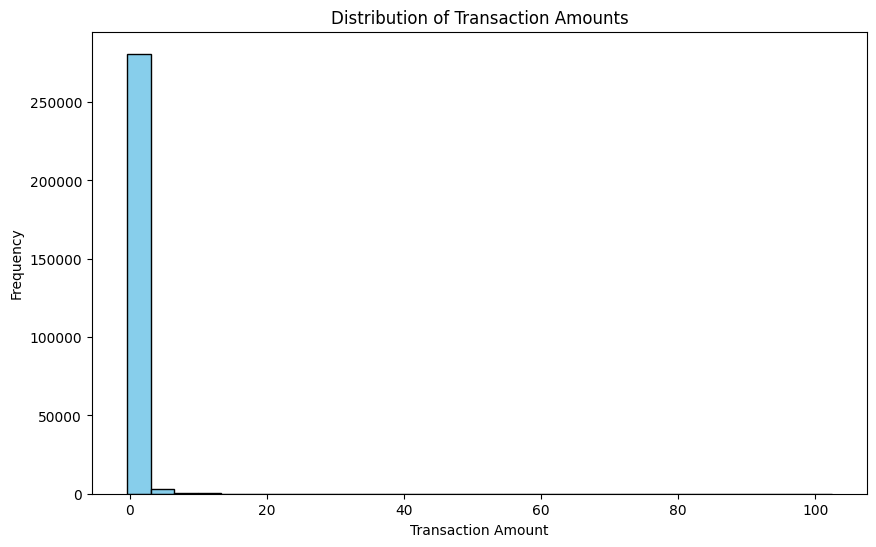

Minimum amount value is  -0.3532293929668236
Maximum amount value is  102.36224270928423
90% of the transactions have an amount less or equal than  0.45838210440258137


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(raw_data['Amount'], bins=30, color='skyblue', edgecolor='black')  # Adjust bins as needed

# Add titles and labels
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")

# Display the histogram
plt.show()

print("Minimum amount value is ", np.min(raw_data.Amount.values))
print("Maximum amount value is ", np.max(raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))


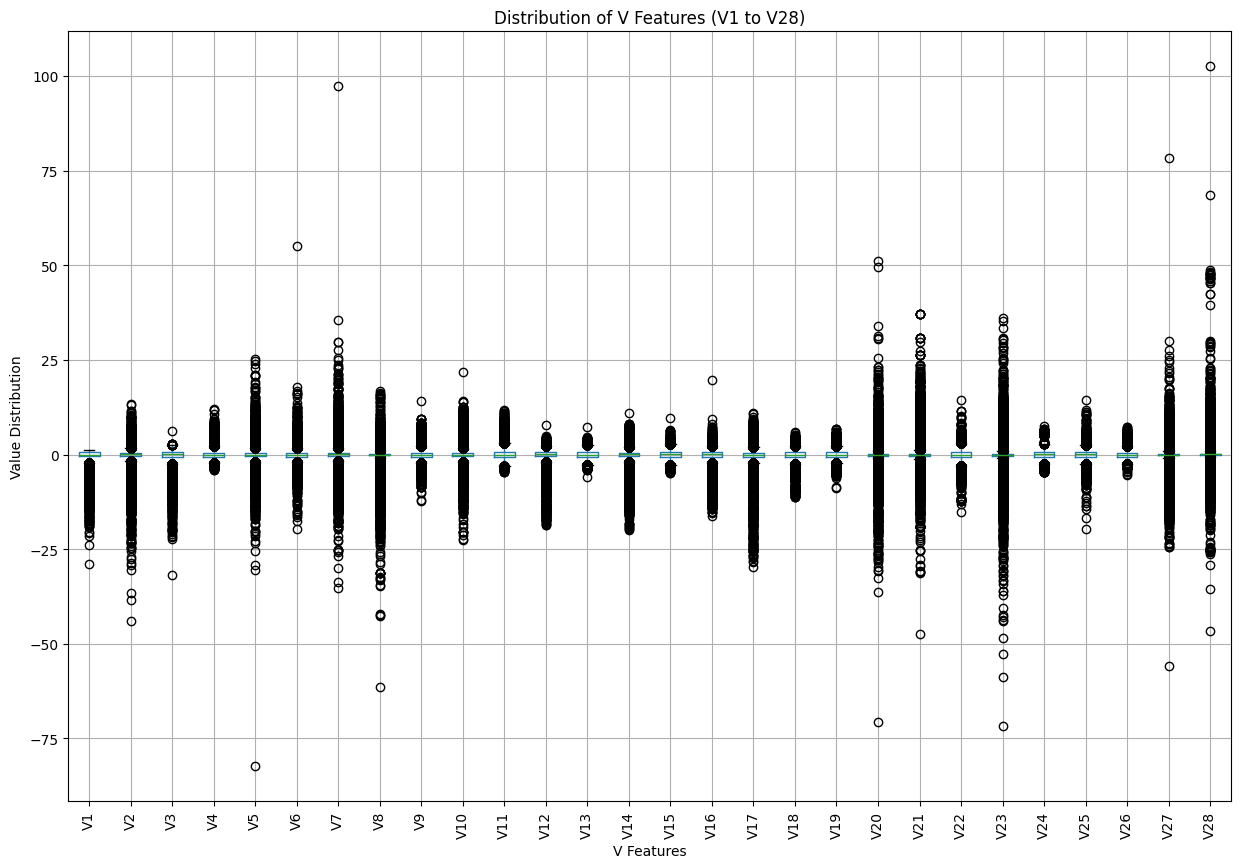

In [ ]:
# Extract all 'V' features for visualization
v_features = raw_data.loc[:, 'V1':'V28']

# Plot box plots for each 'V' feature to show the distribution and outliers
plt.figure(figsize=(15, 10))
v_features.boxplot()
plt.title("Distribution of V Features (V1 to V28)")
plt.xlabel("V Features")
plt.ylabel("Value Distribution")
plt.xticks(rotation=90)
plt.show()

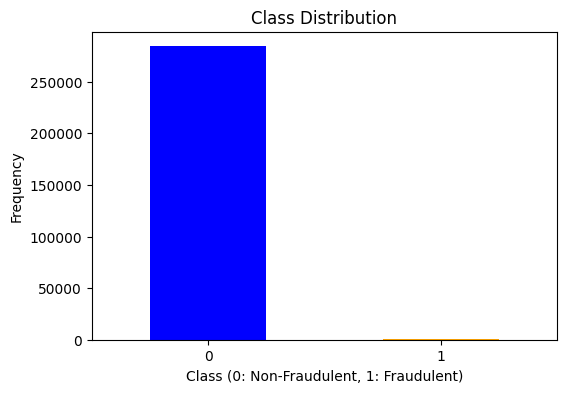

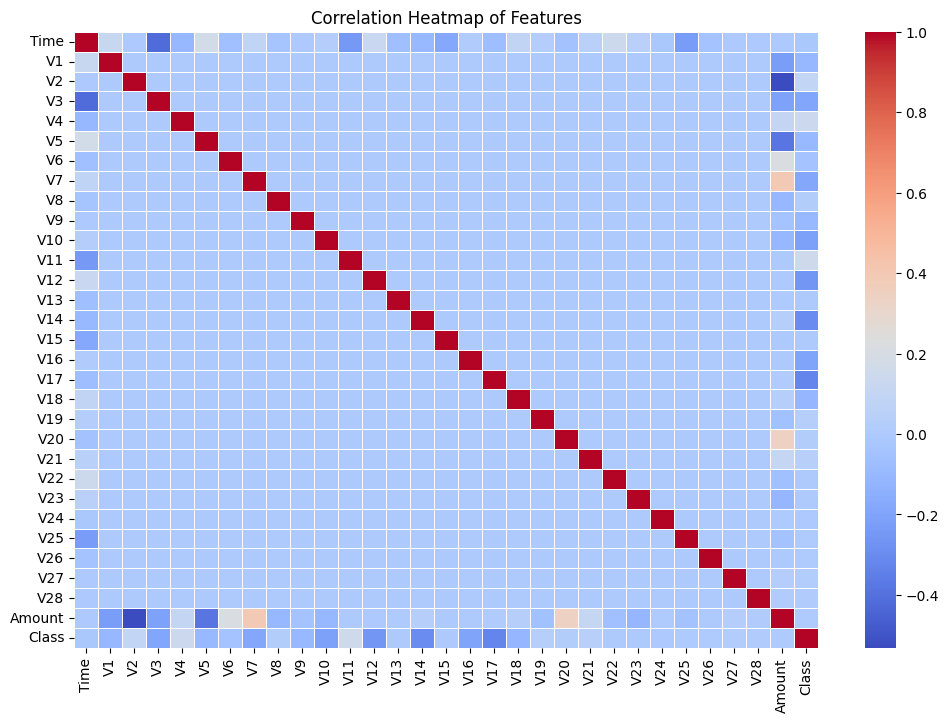

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Creditcard_Dataset.csv")

# Plot the class distribution
plt.figure(figsize=(6, 4))
data['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


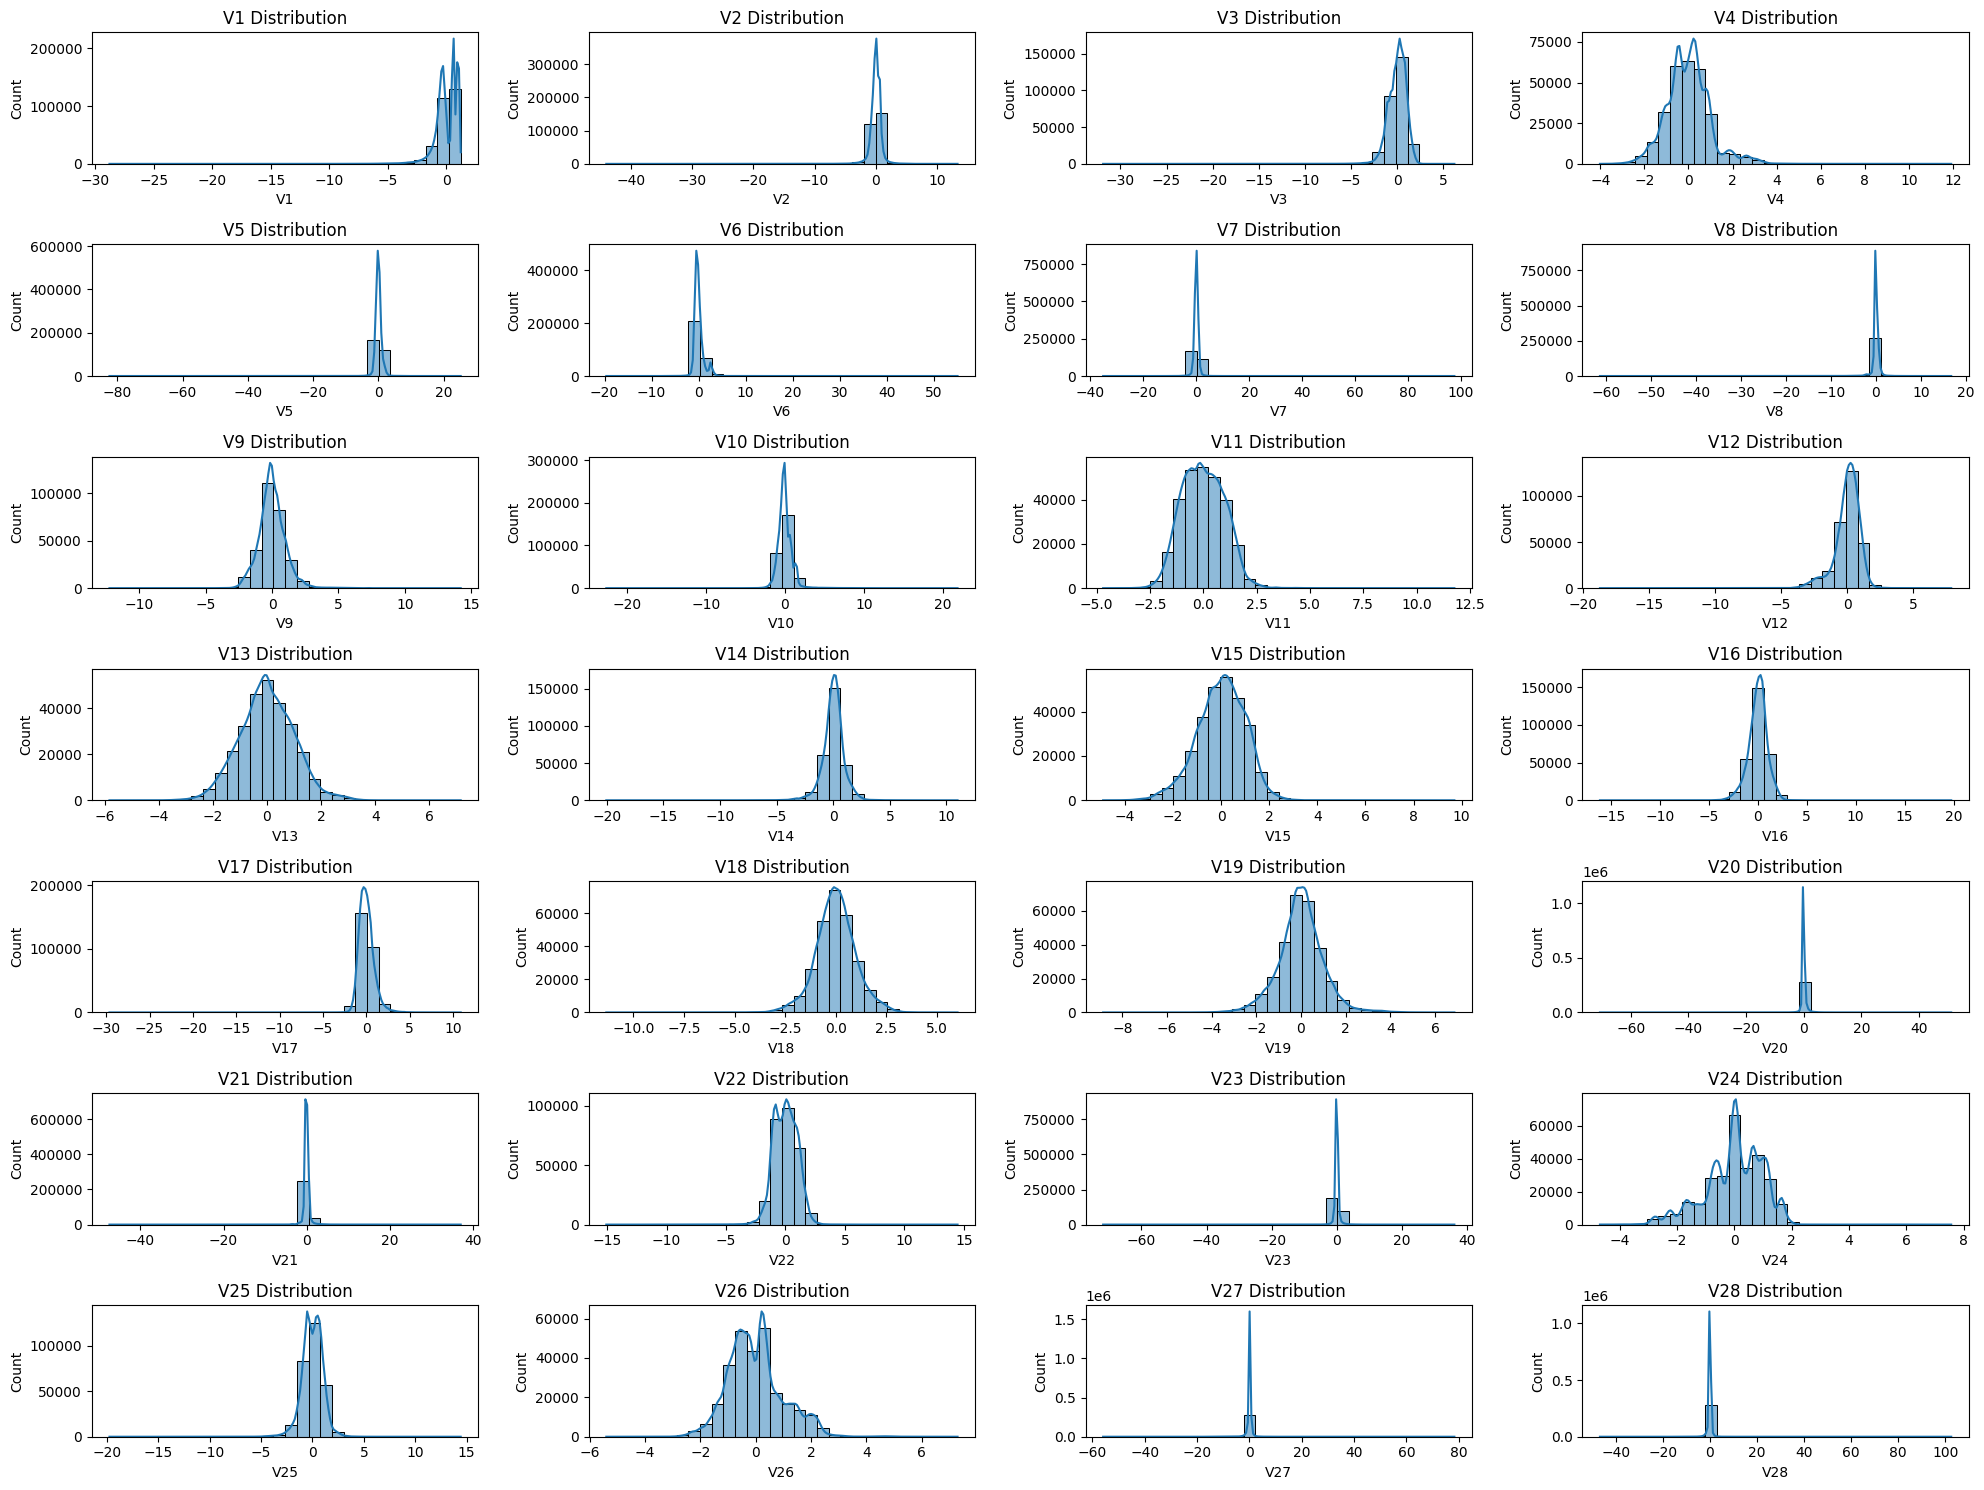

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 15))

# Plot each 'V' feature in a subplot
for i, col in enumerate(v_features.columns, 1):
    plt.subplot(7, 4, i)
    sns.histplot(raw_data[col], bins=30, kde=True)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()

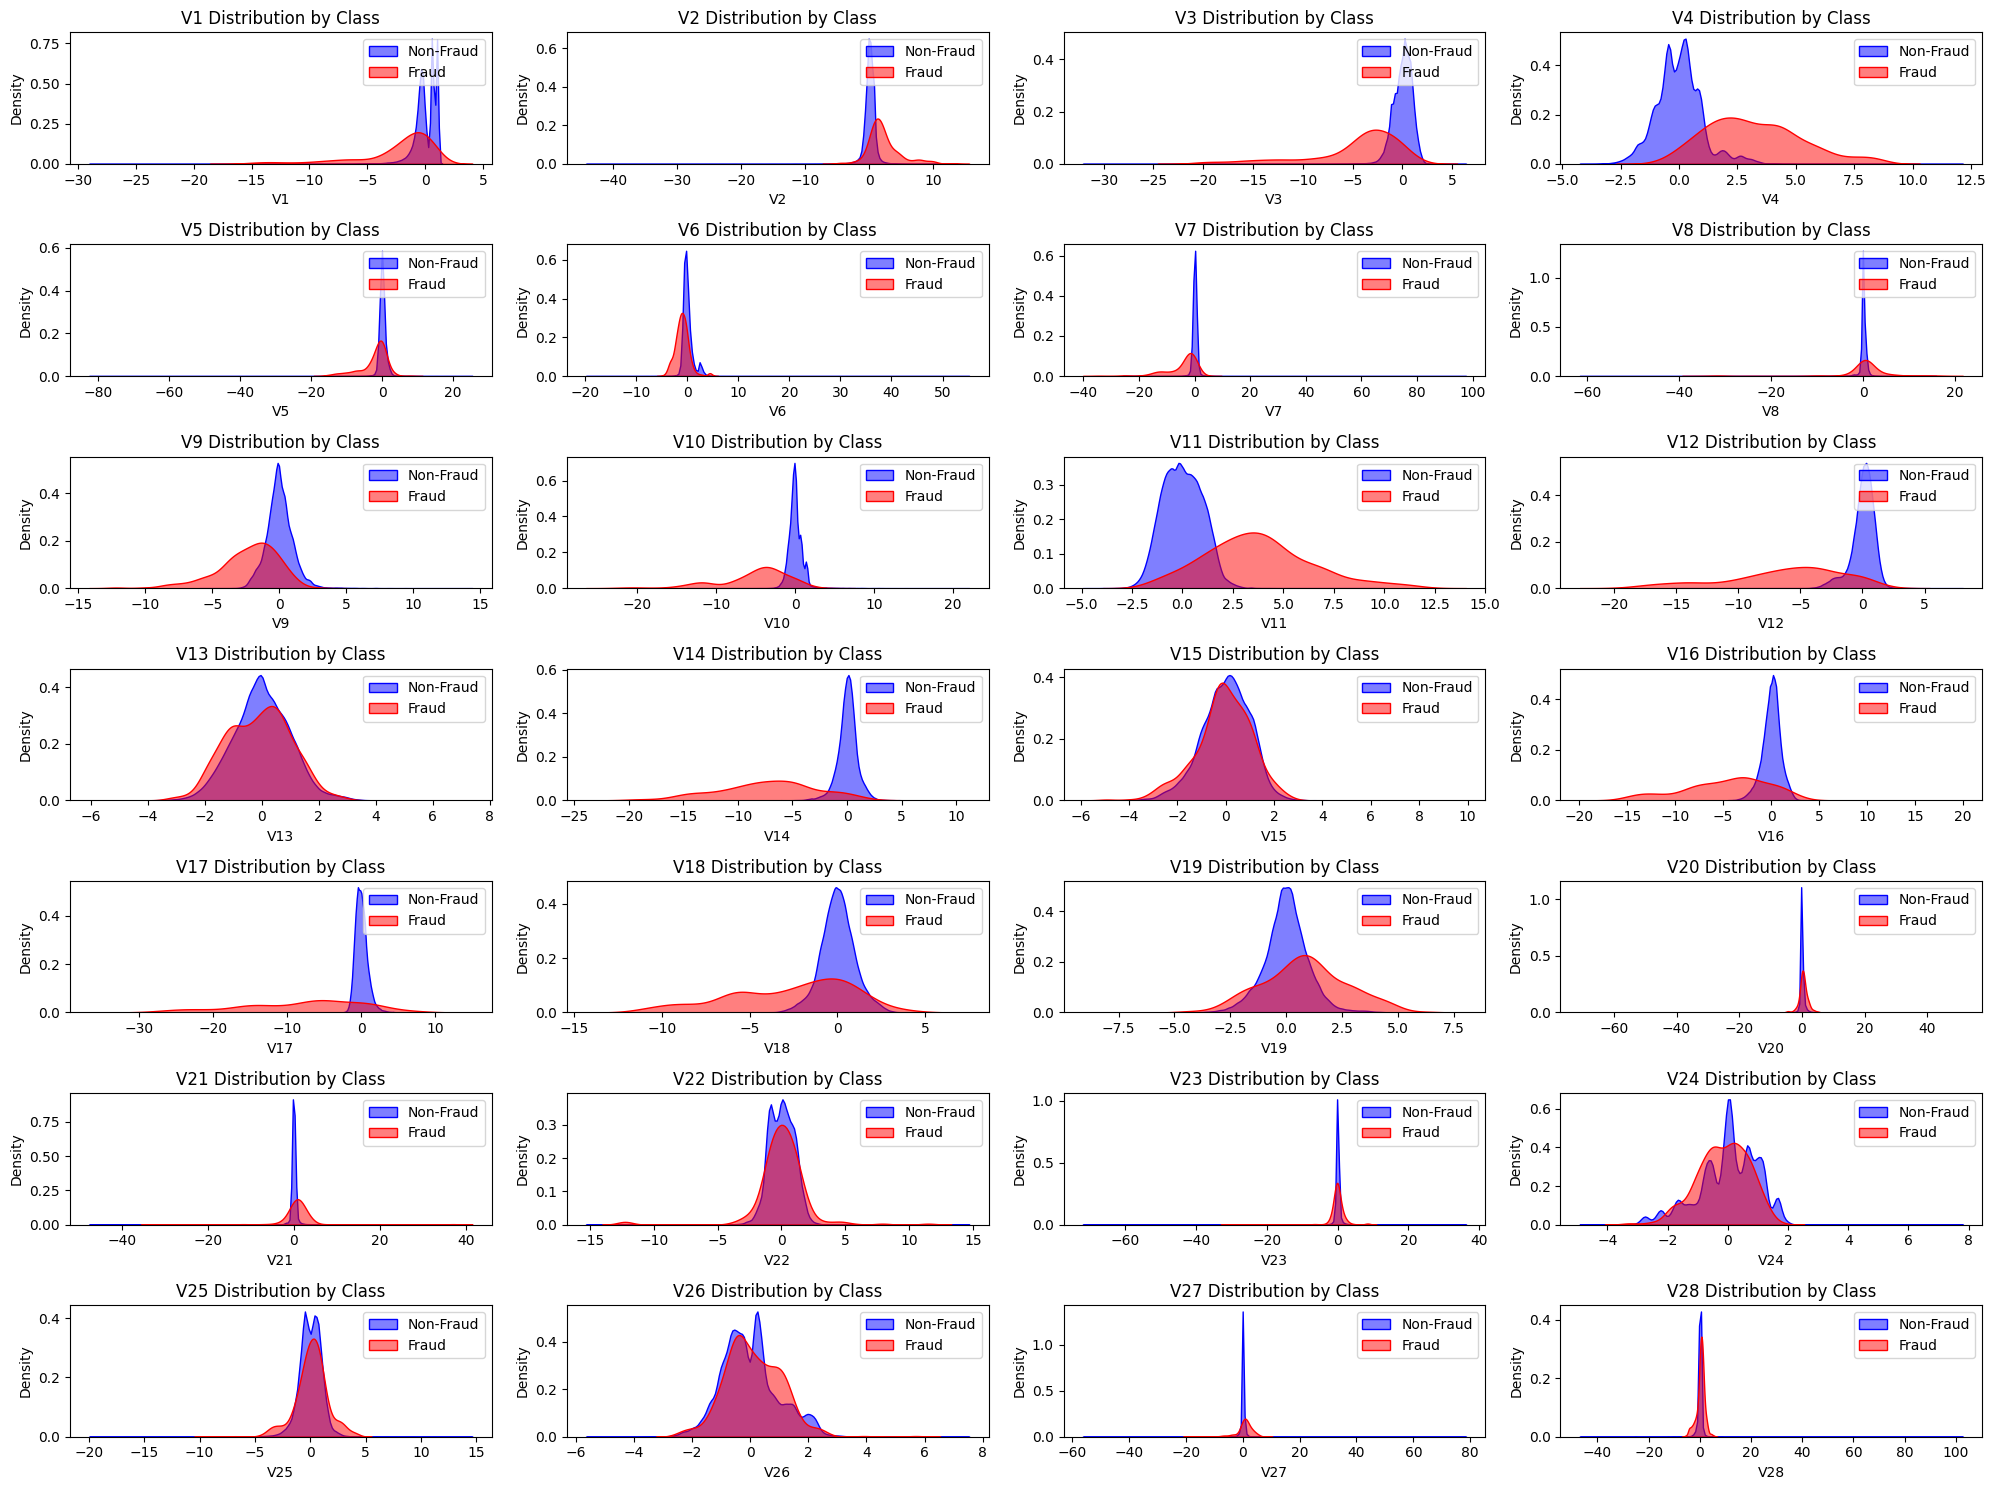

In [ ]:
# Set up the plot grid
plt.figure(figsize=(20, 15))

# Plot each 'V' feature with separate density plots for fraud and non-fraud
for i, col in enumerate(v_features.columns, 1):
    plt.subplot(7, 4, i)
    sns.kdeplot(raw_data[raw_data['Class'] == 0][col], label="Non-Fraud", fill=True, color="blue", alpha=0.5)
    sns.kdeplot(raw_data[raw_data['Class'] == 1][col], label="Fraud", fill=True, color="red", alpha=0.5)
    plt.title(f"{col} Distribution by Class")
    plt.legend()

plt.tight_layout()
plt.show()

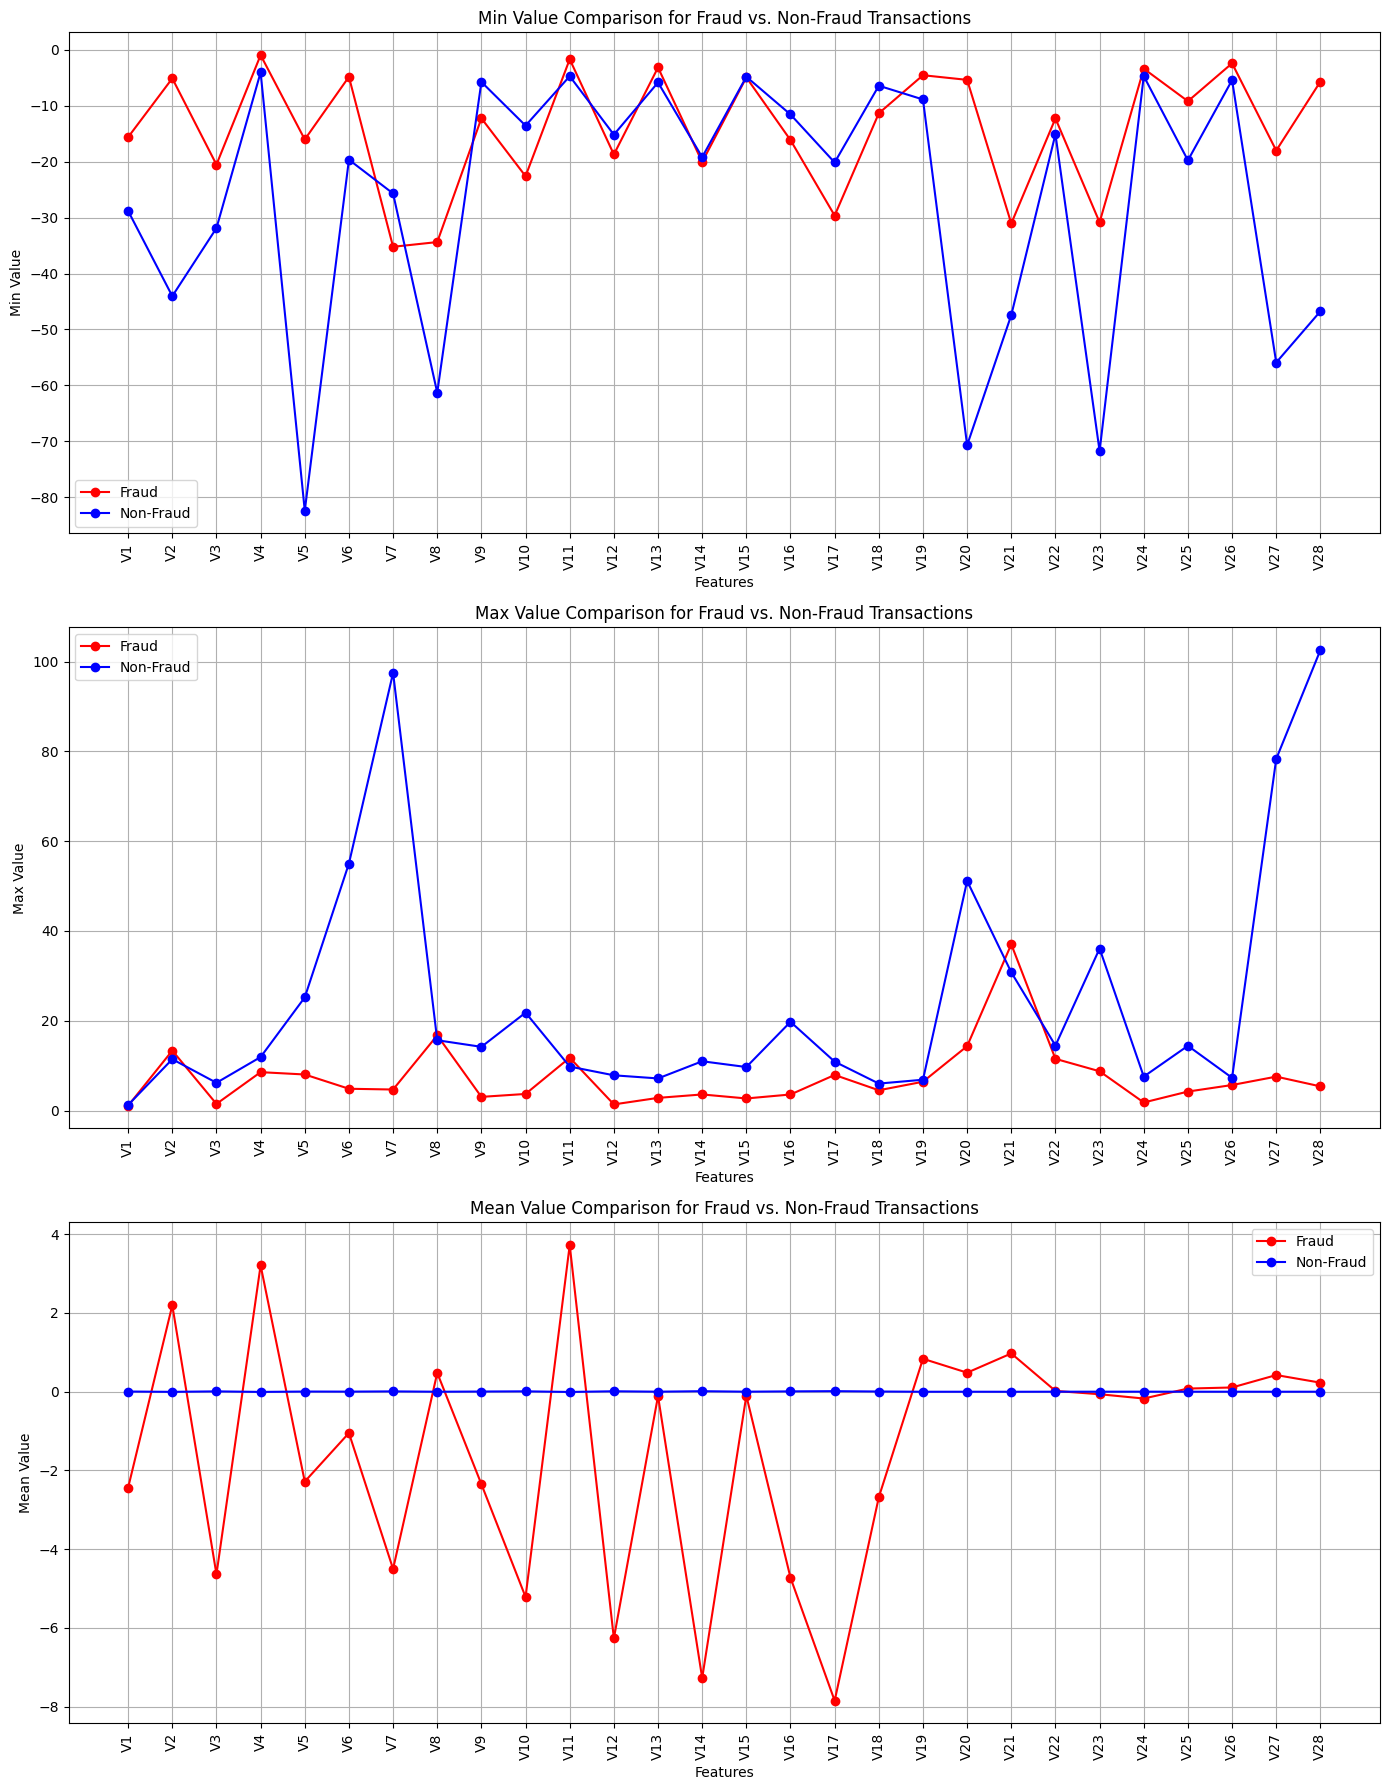

In [ ]:
# Separate fraudulent and non-fraudulent data
fraud_data = raw_data[raw_data['Class'] == 1]
non_fraud_data = raw_data[raw_data['Class'] == 0]

# Calculate min, max, and mean for fraud and non-fraud transactions, excluding 'Time', 'Class', and 'Amount'
fraud_summary = fraud_data.drop(columns=['Time', 'Class', 'Amount']).agg(['min', 'max', 'mean']).transpose()
non_fraud_summary = non_fraud_data.drop(columns=['Time', 'Class', 'Amount']).agg(['min', 'max', 'mean']).transpose()

# Plotting min, max, and mean for each variable in both fraud and non-fraud transactions
fig, ax = plt.subplots(3, 1, figsize=(14, 18))
metrics = ['min', 'max', 'mean']

for i, metric in enumerate(metrics):
    ax[i].plot(fraud_summary.index, fraud_summary[metric], label="Fraud", color='red', marker='o')
    ax[i].plot(non_fraud_summary.index, non_fraud_summary[metric], label="Non-Fraud", color='blue', marker='o')
    ax[i].set_title(f'{metric.capitalize()} Value Comparison for Fraud vs. Non-Fraud Transactions')
    ax[i].set_xlabel("Features")
    ax[i].set_ylabel(f'{metric.capitalize()} Value')
    ax[i].legend()
    ax[i].grid(True)
    ax[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# 2.1  Cleaning and Handling Missing Data


In [ ]:
from sklearn.preprocessing import normalize, StandardScaler


# Check for missing values
print("Missing values per column:")
print(raw_data.isnull().sum())

# standardize features by removing the mean and scaling to unit variance
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)
print(X[:5])




Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
X.shape= (284807, 29) y.shape= (284807,)
[[-0.05617142 -0.00356612  0.13534477  0.07875539 -0.01983248  0.0280814
   0.01567064  0.00668621  0.02679168  0.00674676 -0.04372455 -0.05002655
  -0.08059476 -0.02626434  0.12978139 -0.04343536  0.019812    0.00248961
   0.04015437  0.02638634 -0.00201656  0.0309769  -0.01431397  0.00894116
   0.01995133 -0.03173066  0.02677257 -0.00516056  0.01982016]
 [ 0.0617268   0.01634993  0.01113799  0.03210857  0.00441102 -0.00627111
  -0.00646185  0.00722806 -0.02358457 -0.01555602  0.16027791  0.10814566
   0.04985022 -0.01521445  0.07043698  0.

## 2.2  Addressing Imbalanced Classes /  4.2  Cross-Validation Techniques: k-Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, accuracy_score

def k_fold_cross_validation(classifier, X, y, n_splits=5):
    """
    Perform K-Fold Cross-Validation with class weights for handling imbalance.

    Parameters:
    - classifier: The initialized classifier (e.g., DecisionTreeClassifier).
    - X: Feature matrix.
    - y: Labels vector.
    - n_splits: Number of folds for cross-validation (default: 5).

    Returns:
    - None (prints evaluation metrics for each fold).
    """
    # Initialize K-Fold Cross-Validation
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    fold_idx = 1
    for train_idx, test_idx in kf.split(X, y):
        print(f"\nFold {fold_idx}")

        # Split the data
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Compute sample weights for class imbalance
        w_train = compute_sample_weight('balanced', y_train)

        # Train the model with sample weights
        classifier.fit(X_train, y_train, sample_weight=w_train)

        # Predict on the test set
        y_pred = classifier.predict(X_test)

        # Evaluate the model
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

        fold_idx += 1


#   3.1  Feature Importance and Correlation Analysis

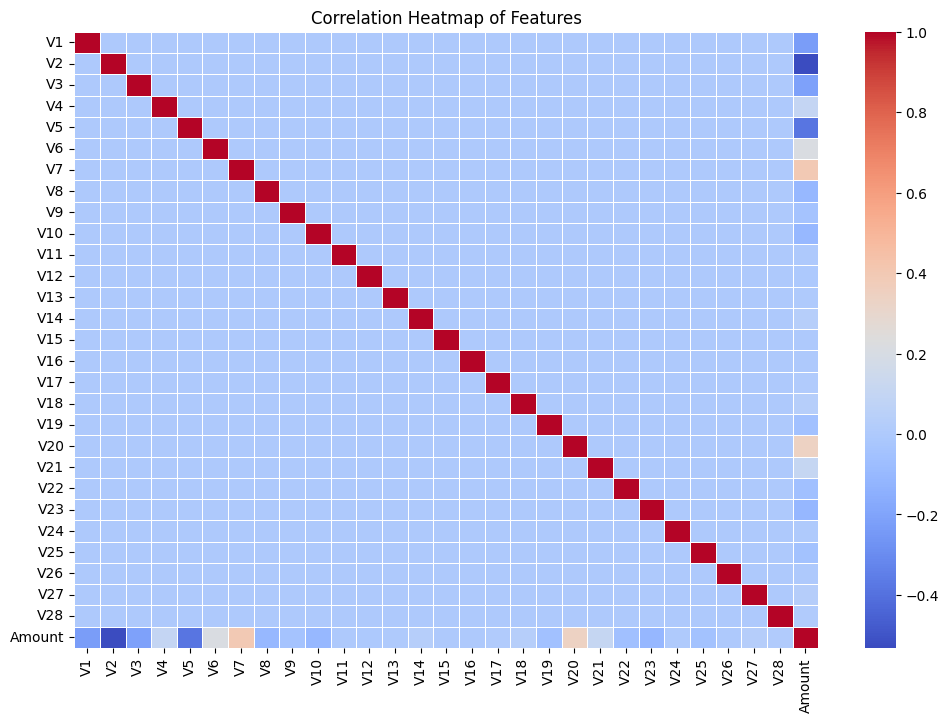

Highly Correlated Feature Pairs:


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Compute the correlation matrix
correlation_matrix = raw_data.drop(columns=["Class", "Time"]).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Identify highly correlated features
threshold = 0.9
high_correlation_pairs = [
    (col1, col2)
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold
]

print("Highly Correlated Feature Pairs:")
for pair in high_correlation_pairs:
    print(pair)


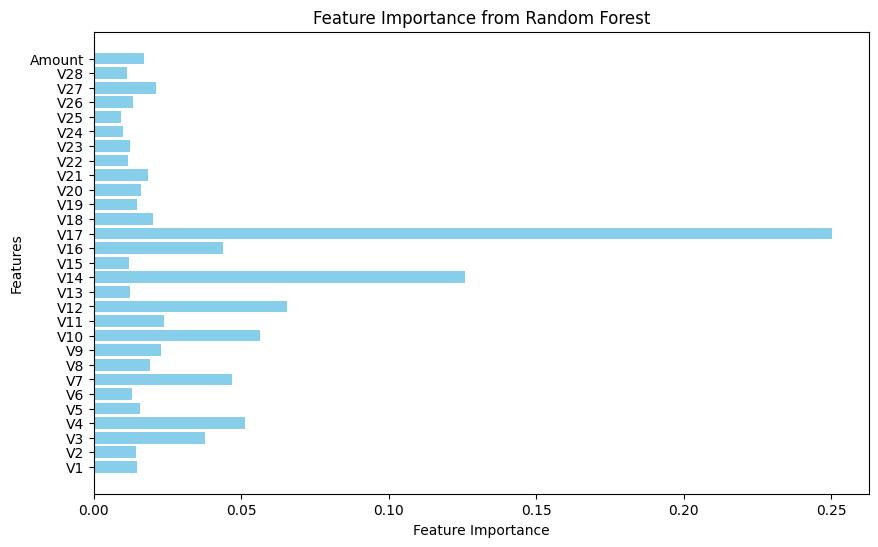

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Feature names corresponding to the columns in X (assuming raw_data is the original DataFrame)
feature_names = raw_data.columns[1:30]  # Excluding 'Time' and 'Class'

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
importance = rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()


#  3.2  Principal Component Analysis (PCA)


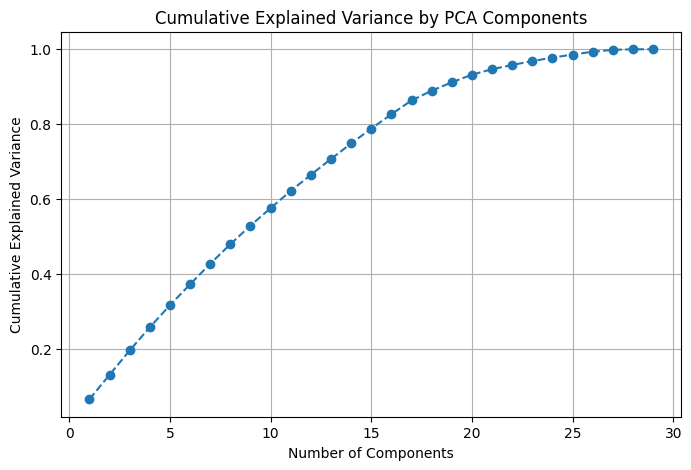

Number of components to retain 95% variance: 21


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Determine the number of components needed to retain 95% variance
n_components = sum(cumulative_variance <= 0.95)
print(f"Number of components to retain 95% variance: {n_components}")


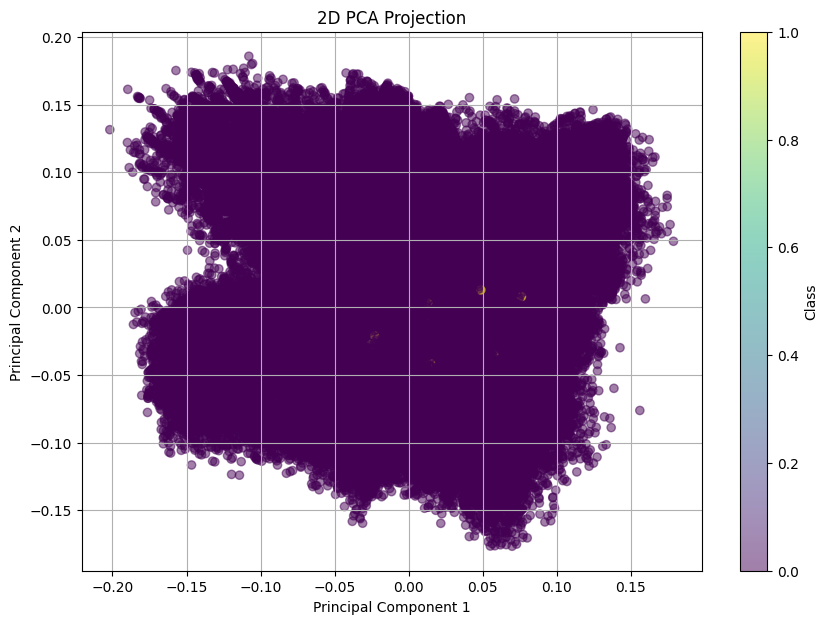

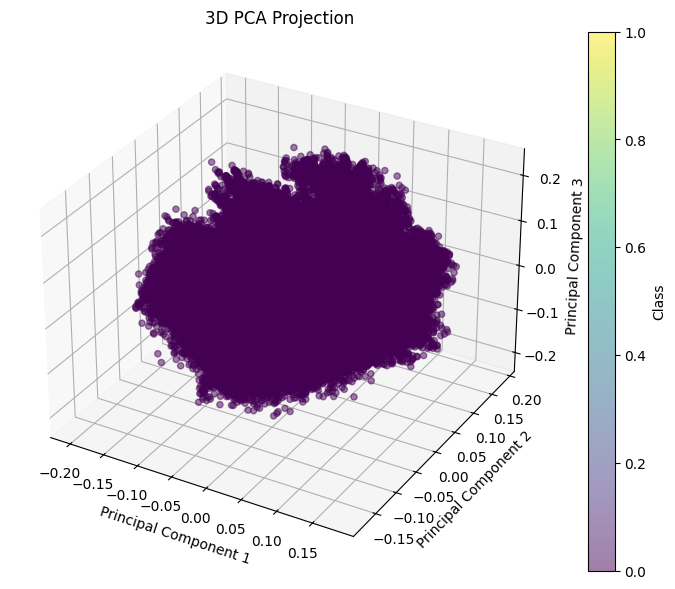

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA with 2 components for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Plot the data projected on the first 2 principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.grid()
plt.show()

# Perform PCA with 3 components for 3D visualization
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', alpha=0.5)
plt.title('3D PCA Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc, label='Class')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Run cross-validation on the original dataset
print("Performance on Original Dataset:")
k_fold_cross_validation(classifier, X, y, n_splits=5)

# Apply PCA to reduce dimensionality (retain components for 95% variance)
pca = PCA(n_components=21)  # Assume 21 components capture 95% variance
X_pca = pca.fit_transform(X)

# Run cross-validation on the PCA-transformed dataset
print("\nPerformance on PCA-Transformed Dataset:")
k_fold_cross_validation(classifier, X_pca, y, n_splits=5)


Performance on Original Dataset:

Fold 1
Accuracy: 0.9994
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.94      0.73      0.82        99

    accuracy                           1.00     56962
   macro avg       0.97      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Fold 2
Accuracy: 0.9995
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.99      0.74      0.84        99

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Fold 3
Accuracy: 0.9995
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.97      0.71      0.82        98

    a

# 3.3  Recursive Feature Elimination (RFE)

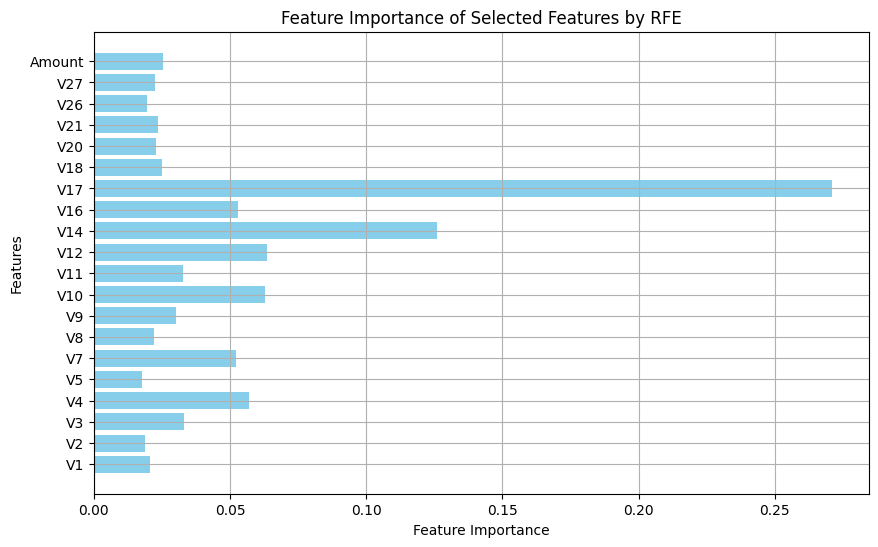

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model and RFE
classifier = RandomForestClassifier(random_state=42)
n_features_to_select = 20

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=classifier, n_features_to_select=n_features_to_select, step=5)
rfe.fit(X, y)

# Get the selected features and their rankings
selected_features_indices = rfe.get_support(indices=True)
selected_features_names = [raw_data.columns[i + 1] for i in selected_features_indices]  # Adjust index for columns

# Fit the Random Forest model on the reduced feature set
X_reduced = rfe.transform(X)  # Transform the dataset to keep only selected features
classifier.fit(X_reduced, y)

# Get feature importances for the reduced feature set
feature_importances = classifier.feature_importances_

# Create a DataFrame for visualization
feature_data = pd.DataFrame({
    "Feature": selected_features_names,
    "Importance": feature_importances
})

# Plot feature importance for selected features
plt.figure(figsize=(10, 6))
plt.barh(feature_data["Feature"], feature_data["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance of Selected Features by RFE")
plt.grid(True)
plt.show()


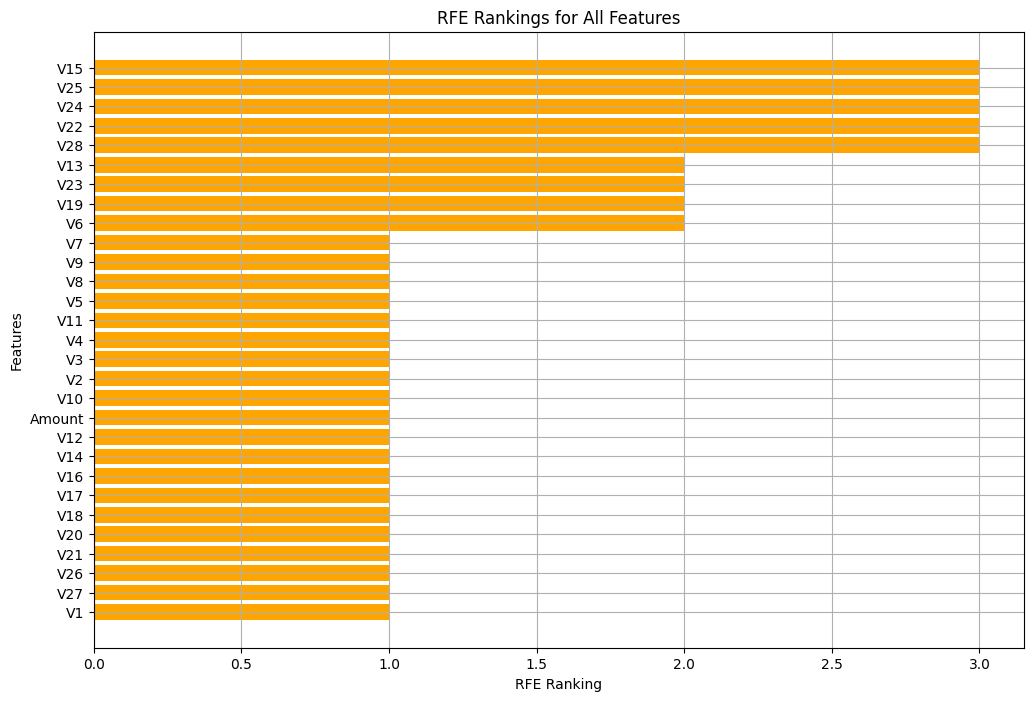

In [ ]:
# Create a DataFrame for all features and their rankings
all_features_data = pd.DataFrame({
    "Feature": raw_data.columns[1:30],  # Exclude Time and Class
    "Ranking": rfe.ranking_
})

# Sort the DataFrame by ranking for better visualization
all_features_data_sorted = all_features_data.sort_values(by="Ranking", ascending=True)

# Plot RFE rankings
plt.figure(figsize=(12, 8))
plt.barh(all_features_data_sorted["Feature"], all_features_data_sorted["Ranking"], color="orange")
plt.xlabel("RFE Ranking")
plt.ylabel("Features")
plt.title("RFE Rankings for All Features")
plt.grid(True)
plt.show()


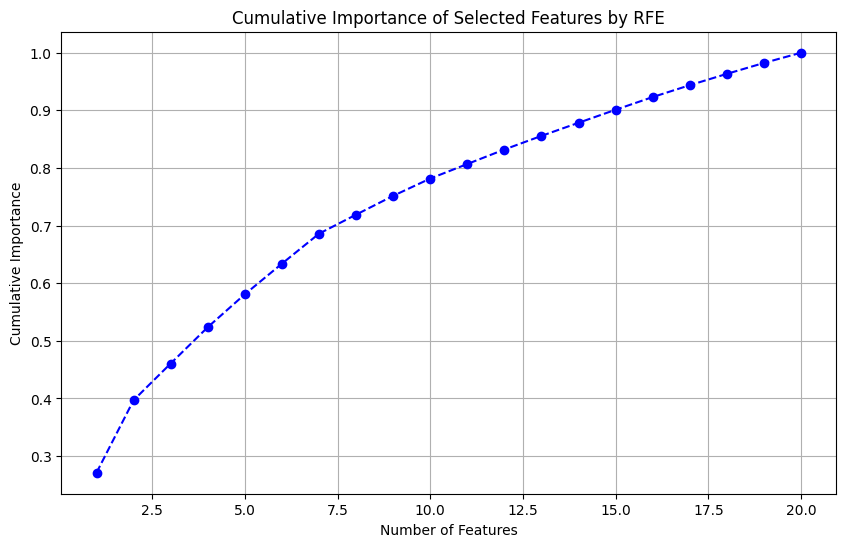

In [ ]:
# Calculate cumulative importance of selected features
cumulative_importance = np.cumsum(feature_data["Importance"].sort_values(ascending=False))

# Plot cumulative importance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', linestyle='--', color='blue')
plt.title("Cumulative Importance of Selected Features by RFE")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.grid(True)
plt.show()


In [ ]:
# Transform the dataset using the pre-selected features
X_reduced = rfe.transform(X)  # Use the RFE object from earlier to reduce features

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Perform K-Fold Cross-Validation on the reduced dataset
print("\nPerformance on RFE-Reduced Dataset:")
k_fold_cross_validation(classifier, X_reduced, y, n_splits=5)



Performance on RFE-Reduced Dataset:

Fold 1
Accuracy: 0.9994
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.91      0.75      0.82        99

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Fold 2
Accuracy: 0.9996
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       1.00      0.76      0.86        99

    accuracy                           1.00     56962
   macro avg       1.00      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Fold 3
Accuracy: 0.9995
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.97      0.74      0.84        98

 

# 5  Classification Techniques

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Initialize the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Artificial Neural Network (ANN)": MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100,))
}

# Loop through each classifier and perform K-Fold Cross-Validation
for clf_name, clf in classifiers.items():
    print(f"\nPerformance of {clf_name} on RFE-Reduced Dataset:")
    k_fold_cross_validation(clf, X_reduced, y, n_splits=5)



Performance of Logistic Regression on RFE-Reduced Dataset:

Fold 1
Accuracy: 0.9720
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     56863
         1.0       0.05      0.91      0.10        99

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962


Fold 2
Accuracy: 0.9665
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     56863
         1.0       0.05      0.94      0.09        99

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962


Fold 3
Accuracy: 0.9705
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     56863
         1.0       0.05      0.93

TypeError: BaseMultilayerPerceptron.fit() got an unexpected keyword argument 'sample_weight'

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

def k_fold_cross_validation_for_mlp(classifier, X, y, n_splits=5):
    """
    Perform K-Fold Cross-Validation with oversampling for imbalance handling.

    Parameters:
    - classifier: The initialized classifier (e.g., MLPClassifier).
    - X: Feature matrix.
    - y: Labels vector.
    - n_splits: Number of folds for cross-validation (default: 5).

    Returns:
    - None (prints evaluation metrics for each fold).
    """
    # Initialize K-Fold Cross-Validation
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    fold_idx = 1
    for train_idx, test_idx in kf.split(X, y):
        print(f"\nFold {fold_idx}")

        # Split the data
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Balance the training data using oversampling
        oversampler = RandomOverSampler(random_state=42)
        X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

        # Train the model
        classifier.fit(X_train_balanced, y_train_balanced)

        # Predict on the test set
        y_pred = classifier.predict(X_test)

        # Evaluate the model
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

        fold_idx += 1



In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100,))

# Perform K-Fold Cross-Validation with oversampling
print("\nPerformance of Artificial Neural Network (ANN) on RFE-Reduced Dataset:")
k_fold_cross_validation_for_mlp(mlp_classifier, X_reduced, y, n_splits=5)


Performance of Artificial Neural Network (ANN) on RFE-Reduced Dataset:

Fold 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.9905
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     56863
         1.0       0.14      0.86      0.24        99

    accuracy                           0.99     56962
   macro avg       0.57      0.92      0.62     56962
weighted avg       1.00      0.99      0.99     56962


Fold 2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.9953
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.26      0.91      0.40        99

    accuracy                           1.00     56962
   macro avg       0.63      0.95      0.70     56962
weighted avg       1.00      1.00      1.00     56962


Fold 3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.9957
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.27      0.86      0.41        98

    accuracy                           1.00     56961
   macro avg       0.63      0.93      0.70     56961
weighted avg       1.00      1.00      1.00     56961


Fold 4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.9947
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     56863
         1.0       0.23      0.86      0.36        98

    accuracy                           0.99     56961
   macro avg       0.61      0.93      0.68     56961
weighted avg       1.00      0.99      1.00     56961


Fold 5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.9958
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.26      0.82      0.40        98

    accuracy                           1.00     56961
   macro avg       0.63      0.91      0.70     56961
weighted avg       1.00      1.00      1.00     56961



# 6.2  Grid Search and Randomized Search

Logistic Regression, SVM, ANN


In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score

# Define hyperparameter grids for each classifier
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1.0, 10, 100],
        "max_iter": [500, 1000, 1500]
    },
    "SVM": {
        "C": [0.1, 1.0, 10],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"]
    },
    "ANN": {
        "hidden_layer_sizes": [(100, 50), (200,), (200, 50)],
        "learning_rate": ["constant", "adaptive"],
        "solver": ["adam", "sgd"],
        "max_iter": [300, 500]
    }
}

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "ANN": MLPClassifier(random_state=42)
}

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, pos_label=1),
    "recall": make_scorer(recall_score, pos_label=1),
    "f1": make_scorer(f1_score, pos_label=1)
}

# Perform Randomized Search for each classifier
results = {}
for clf_name, clf in classifiers.items():
    print(f"\nPerforming Randomized Search for {clf_name}...")
    param_grid = param_grids[clf_name]

    # Randomized Search
    start_time = time.time()
    random_search = RandomizedSearchCV(
        clf,
        param_distributions=param_grid,
        scoring=scoring,
        refit="f1",
        cv=3,
        n_iter=5,  # Reduced to 5 iterations
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_reduced, y)
    random_time = time.time() - start_time

    # Store results
    results[clf_name] = {
        "Best Params (Random Search)": random_search.best_params_,
        "Best Score (Random Search - F1)": random_search.best_score_,
        "Time Spent (Random Search)": random_time,
        "Detailed Metrics (Random Search)": {metric: random_search.cv_results_[f"mean_test_{metric}"][random_search.best_index_] for metric in scoring.keys()}
    }

# Print results
for clf_name, result in results.items():
    print(f"\nResults for {clf_name}:")
    for key, value in result.items():
        print(f"{key}: {value}")



Performing Randomized Search for Logistic Regression...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Performing Randomized Search for SVM...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Performing Randomized Search for ANN...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Results for Logistic Regression:
Best Params (Random Search): {'max_iter': 1000, 'C': 100}
Best Score (Random Search - F1): 0.7636696324066712
Time Spent (Random Search): 22.05398392677307
Detailed Metrics (Random Search): {'accuracy': 0.9992626590160939, 'precision': 0.8657969710601289, 'recall': 0.6930894308943091, 'f1': 0.7636696324066712}

Results for SVM:
Best Params (Random Search): {'kernel': 'poly', 'gamma': 'scale', 'C': 1.0}
Best Score (Random Search - F1): 0.8022082995463652
Time Spent (Random Search): 1912.4996502399445
Detailed Metrics (Random Search): {'accuracy': 0.9993469265338643, 'precision': 0.8526976782097825, 'recall': 0.7642276422764228, 'f1': 0.8022

Decision Trees, Random Forest

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score

# Define hyperparameter grids for Decision Tree and Random Forest
param_grids = {
    "Decision Tree": {
        "max_depth": [5, 10, 15, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 150, 200],
        "max_depth": [5, 10, 15, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
}

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, pos_label=1),
    "recall": make_scorer(recall_score, pos_label=1),
    "f1": make_scorer(f1_score, pos_label=1)
}

# Perform Randomized Search for each classifier
results = {}
for clf_name, clf in classifiers.items():
    print(f"\nPerforming Randomized Search for {clf_name}...")
    param_grid = param_grids[clf_name]

    # Randomized Search
    start_time = time.time()
    random_search = RandomizedSearchCV(
        clf,
        param_distributions=param_grid,
        scoring=scoring,
        refit="f1",
        cv=3,
        n_iter=5,  # Reduced to 5 iterations
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_reduced, y)
    random_time = time.time() - start_time

    # Store results
    results[clf_name] = {
        "Best Params (Random Search)": random_search.best_params_,
        "Best Score (Random Search - F1)": random_search.best_score_,
        "Time Spent (Random Search)": random_time,
        "Detailed Metrics (Random Search)": {metric: random_search.cv_results_[f"mean_test_{metric}"][random_search.best_index_] for metric in scoring.keys()}
    }

# Print results
for clf_name, result in results.items():
    print(f"\nResults for {clf_name}:")
    for key, value in result.items():
        print(f"{key}: {value}")



Performing Randomized Search for Decision Tree...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Performing Randomized Search for Random Forest...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Results for Decision Tree:
Best Params (Random Search): {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best Score (Random Search - F1): 0.6697984432855817
Time Spent (Random Search): 240.17726731300354
Detailed Metrics (Random Search): {'accuracy': 0.9990274113357587, 'precision': 0.8137270474216719, 'recall': 0.5894308943089431, 'f1': 0.6697984432855817}

Results for Random Forest:
Best Params (Random Search): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Score (Random Search - F1): 0.7566226750138009
Time Spent (Random Search): 2331.301179409027
Detailed Metrics (Random Search): {'accuracy': 0.9992486142448757, 'precision': 0.8754325620179279, 'recall': 0.676829268292683, 'f1': 0.7566226750138009}


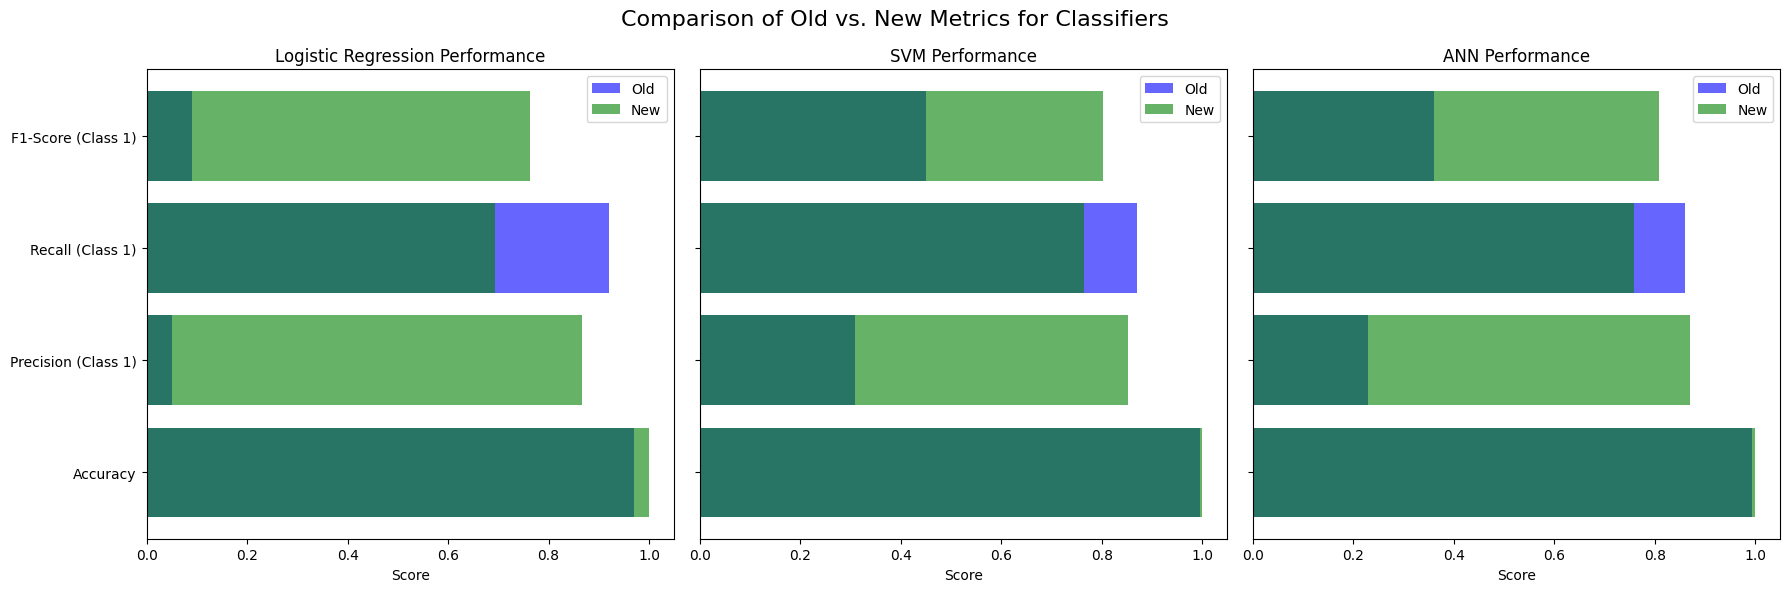

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Old metrics
old_metrics = {
    "Classifier": ["Logistic Regression", "SVM", "ANN"],
    "Accuracy": [0.9694, 0.9964, 0.9944],
    "Precision (Class 1)": [0.05, 0.31, 0.23],
    "Recall (Class 1)": [0.92, 0.87, 0.86],
    "F1-Score (Class 1)": [0.09, 0.45, 0.36]
}

# New metrics
new_metrics = {
    "Classifier": ["Logistic Regression", "SVM", "ANN"],
    "Accuracy": [0.9993, 0.9993, 0.9994],
    "Precision (Class 1)": [0.8658, 0.8527, 0.8697],
    "Recall (Class 1)": [0.6931, 0.7642, 0.7581],
    "F1-Score (Class 1)": [0.7637, 0.8022, 0.8078]
}

# Convert to NumPy arrays for easy plotting
categories = ["Accuracy", "Precision (Class 1)", "Recall (Class 1)", "F1-Score (Class 1)"]
classifiers = old_metrics["Classifier"]
old_values = np.array([old_metrics[metric] for metric in categories])
new_values = np.array([new_metrics[metric] for metric in categories])

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for idx, clf in enumerate(classifiers):
    axes[idx].barh(categories, old_values[:, idx], color="blue", alpha=0.6, label="Old")
    axes[idx].barh(categories, new_values[:, idx], color="green", alpha=0.6, label="New")
    axes[idx].set_title(f"{clf} Performance")
    axes[idx].set_xlabel("Score")
    axes[idx].legend()

plt.suptitle("Comparison of Old vs. New Metrics for Classifiers", fontsize=16)
plt.tight_layout()
plt.show()


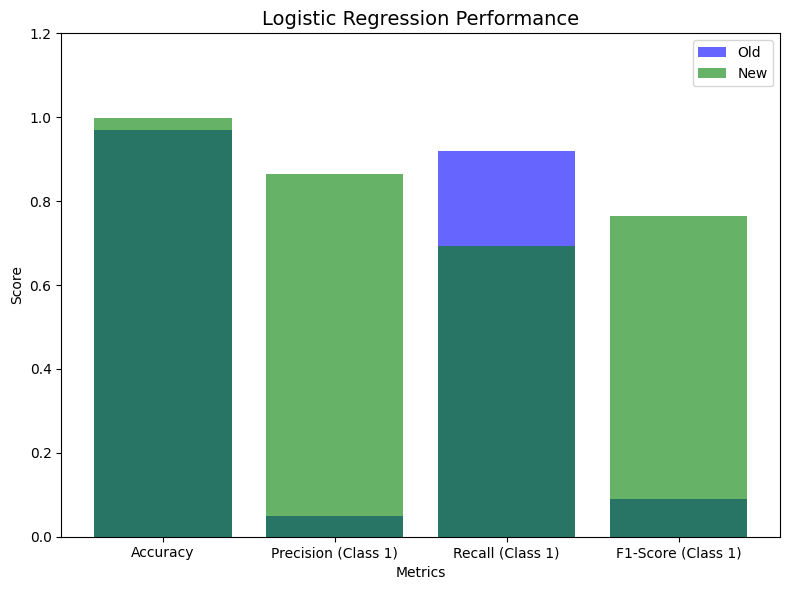

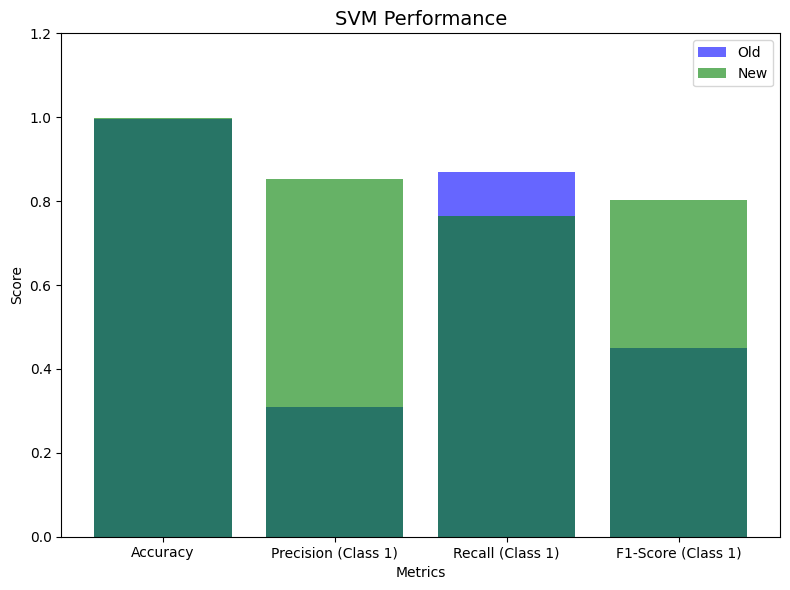

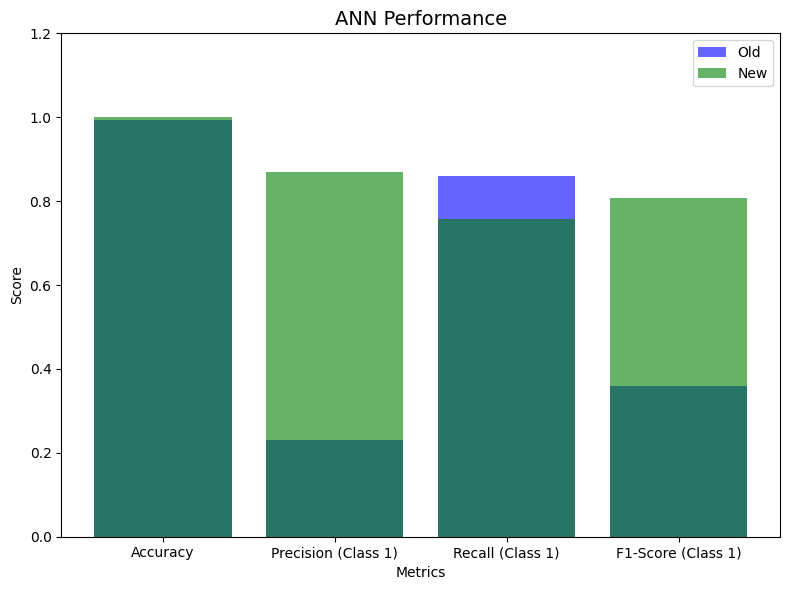

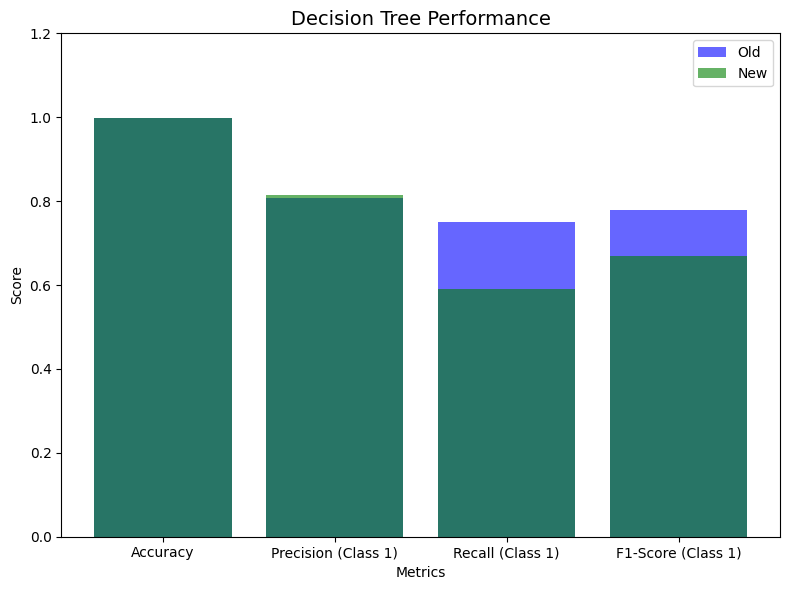

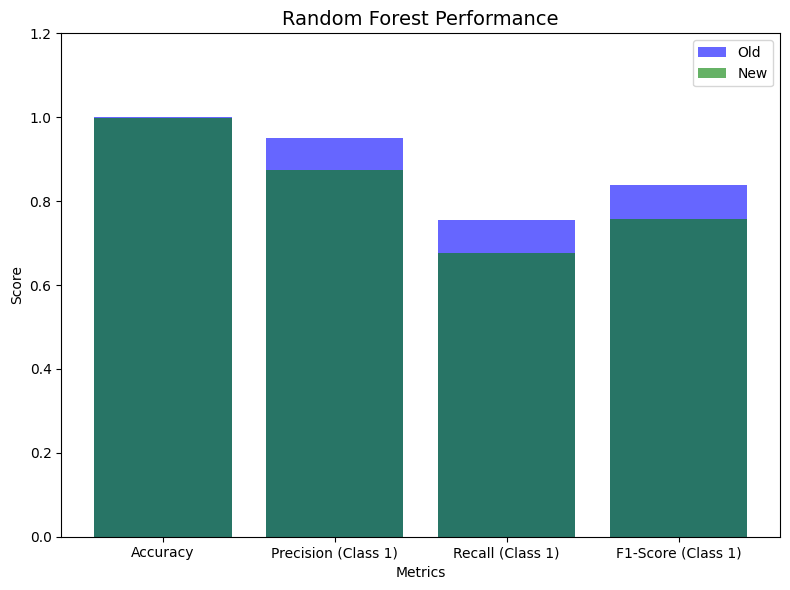

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define old and new metrics
categories = ["Accuracy", "Precision (Class 1)", "Recall (Class 1)", "F1-Score (Class 1)"]
classifiers = ["Logistic Regression", "SVM", "ANN", "Decision Tree", "Random Forest"]

# Updated old and new metrics
old_values = np.array([
    [0.9694, 0.05, 0.92, 0.09],    # Logistic Regression
    [0.9964, 0.31, 0.87, 0.45],    # SVM
    [0.9944, 0.23, 0.86, 0.36],    # ANN
    [0.9992, 0.808, 0.75, 0.78],   # Decision Tree (Old)
    [0.9995, 0.95, 0.754, 0.838]   # Random Forest (Old)
])

new_values = np.array([
    [0.9993, 0.8658, 0.6931, 0.7637],  # Logistic Regression
    [0.9993, 0.8527, 0.7642, 0.8022],  # SVM
    [0.9994, 0.8697, 0.7581, 0.8078],  # ANN
    [0.9990, 0.8137, 0.5894, 0.6698],  # Decision Tree (New)
    [0.9992, 0.8754, 0.6768, 0.7566]   # Random Forest (New)
])

# Create separate plots for each classifier
for idx, clf in enumerate(classifiers):
    plt.figure(figsize=(8, 6))
    plt.bar(categories, old_values[idx], color="blue", alpha=0.6, label="Old")
    plt.bar(categories, new_values[idx], color="green", alpha=0.6, label="New")
    plt.title(f"{clf} Performance", fontsize=14)
    plt.ylabel("Score")
    plt.xlabel("Metrics")
    plt.ylim(0, 1.2)  # Ensure consistent scaling across all plots
    plt.legend()
    plt.tight_layout()
    plt.show()


#    6.3  Bayesian Optimization

In [ ]:
!pip install optuna


import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score

# Custom function to calculate multiple metrics
def calculate_metrics(clf, X, y):
    """Calculate accuracy, precision, recall, and F1-score for the given classifier."""
    scores = {
        "accuracy": cross_val_score(clf, X, y, scoring=make_scorer(accuracy_score), cv=3).mean(),
        "precision": cross_val_score(clf, X, y, scoring=make_scorer(precision_score, pos_label=1), cv=3).mean(),
        "recall": cross_val_score(clf, X, y, scoring=make_scorer(recall_score, pos_label=1), cv=3).mean(),
        "f1": cross_val_score(clf, X, y, scoring=make_scorer(f1_score, pos_label=1), cv=3).mean()
    }
    return scores

# Objective function for Logistic Regression
def objective_logistic(trial):
    C = trial.suggest_loguniform("C", 0.01, 100)
    max_iter = trial.suggest_int("max_iter", 500, 1500)
    clf = LogisticRegression(C=C, max_iter=max_iter, random_state=42)
    score = cross_val_score(clf, X_reduced, y, scoring=make_scorer(f1_score, pos_label=1), cv=3).mean()
    return score

# Objective function for SVM
def objective_svm(trial):
    C = trial.suggest_loguniform("C", 0.01, 100)
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly"])
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
    clf = SVC(C=C, kernel=kernel, gamma=gamma, probability=True, random_state=42)
    score = cross_val_score(clf, X_reduced, y, scoring=make_scorer(f1_score, pos_label=1), cv=3).mean()
    return score

# Objective function for ANN
def objective_ann(trial):
    hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(100,), (100, 50), (200,)])
    learning_rate = trial.suggest_categorical("learning_rate", ["constant", "adaptive"])
    solver = trial.suggest_categorical("solver", ["adam", "sgd"])
    max_iter = trial.suggest_int("max_iter", 300, 500)
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate=learning_rate,
                        solver=solver, max_iter=max_iter, random_state=42)
    score = cross_val_score(clf, X_reduced, y, scoring=make_scorer(f1_score, pos_label=1), cv=3).mean()
    return score

# Objective function for Decision Tree
def objective_decision_tree(trial):
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    score = cross_val_score(clf, X_reduced, y, scoring=make_scorer(f1_score, pos_label=1), cv=3).mean()
    return score

# Objective function for Random Forest
def objective_random_forest(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                 min_samples_split=min_samples_split, random_state=42)
    score = cross_val_score(clf, X_reduced, y, scoring=make_scorer(f1_score, pos_label=1), cv=3).mean()
    return score

# Perform Bayesian Optimization
print("Optimizing Logistic Regression...")
study_logistic = optuna.create_study(direction="maximize")
study_logistic.optimize(objective_logistic, n_trials=10)

print("Optimizing SVM...")
study_svm = optuna.create_study(direction="maximize")
study_svm.optimize(objective_svm, n_trials=10)

print("Optimizing ANN...")
study_ann = optuna.create_study(direction="maximize")
study_ann.optimize(objective_ann, n_trials=10)



# Calculate metrics for the best models
print("\nBest Hyperparameters and Metrics:")

# Logistic Regression
best_logistic = LogisticRegression(**study_logistic.best_params, random_state=42)
logistic_metrics = calculate_metrics(best_logistic, X_reduced, y)
print(f"Logistic Regression: {study_logistic.best_params}")
print(f"Metrics: {logistic_metrics}")

# SVM
best_svm = SVC(**study_svm.best_params, probability=True, random_state=42)
svm_metrics = calculate_metrics(best_svm, X_reduced, y)
print(f"SVM: {study_svm.best_params}")
print(f"Metrics: {svm_metrics}")

# ANN
best_ann = MLPClassifier(**study_ann.best_params, random_state=42)
ann_metrics = calculate_metrics(best_ann, X_reduced, y)
print(f"ANN: {study_ann.best_params}")
print(f"Metrics: {ann_metrics}")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00


[I 2025-01-12 11:26:02,545] A new study created in memory with name: no-name-52780e7e-f0b0-4412-97a4-23bc9f1dfb50


Optimizing Logistic Regression...


<ipython-input-7-db6a98f4ca38>:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.01, 100)
[I 2025-01-12 11:26:04,069] Trial 0 finished with value: 0.7490380338585995 and parameters: {'C': 4.8271269270352795, 'max_iter': 1484}. Best is trial 0 with value: 0.7490380338585995.
<ipython-input-7-db6a98f4ca38>:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.01, 100)
[I 2025-01-12 11:26:05,786] Trial 1 finished with value: 0.7371494858898194 and parameters: {'C': 10.875354313477587, 'max_iter': 1213}. Best is trial 0 with value: 0.7490380338585995.
<ipython-input-7-db6a98f4ca38>:26: FutureWarning: sugges

Optimizing SVM...


[I 2025-01-12 11:32:40,593] Trial 0 finished with value: 0.0 and parameters: {'C': 0.18456439915847267, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 0.0.
<ipython-input-7-db6a98f4ca38>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.01, 100)
[I 2025-01-12 11:38:57,415] Trial 1 finished with value: 0.7994867735485837 and parameters: {'C': 1.8457757025911237, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 1 with value: 0.7994867735485837.
<ipython-input-7-db6a98f4ca38>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.01, 100)
[I 2025-01-12 11:44:25,177] Trial 2 finished with val

Optimizing ANN...


[I 2025-01-12 12:24:49,399] Trial 0 finished with value: 0.8118711196326167 and parameters: {'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam', 'max_iter': 324}. Best is trial 0 with value: 0.8118711196326167.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (200,) which is of typ


Best Hyperparameters and Metrics:
Logistic Regression: {'C': 51.02575576223177, 'max_iter': 840}
Metrics: {'accuracy': 0.9992872370883411, 'precision': 0.8645268536177627, 'recall': 0.7134146341463414, 'f1': 0.7752577782860871}
SVM: {'C': 10.666950423172105, 'kernel': 'linear', 'gamma': 'scale'}
Metrics: {'accuracy': 0.9993715045691268, 'precision': 0.8388600812375766, 'recall': 0.8008130081300813, 'f1': 0.8156158971560875}
ANN: {'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam', 'max_iter': 324}
Metrics: {'accuracy': 0.9993750157804236, 'precision': 0.8596088545024716, 'recall': 0.774390243902439, 'f1': 0.8118711196326167}


In [8]:
print("Optimizing Decision Tree...")
study_decision_tree = optuna.create_study(direction="maximize")
study_decision_tree.optimize(objective_decision_tree, n_trials=10)

print("Optimizing Random Forest...")
study_random_forest = optuna.create_study(direction="maximize")
study_random_forest.optimize(objective_random_forest, n_trials=10)

# Decision Tree
best_decision_tree = DecisionTreeClassifier(**study_decision_tree.best_params, random_state=42)
decision_tree_metrics = calculate_metrics(best_decision_tree, X_reduced, y)
print(f"Decision Tree: {study_decision_tree.best_params}")
print(f"Metrics: {decision_tree_metrics}")

# Random Forest
best_random_forest = RandomForestClassifier(**study_random_forest.best_params, random_state=42)
random_forest_metrics = calculate_metrics(best_random_forest, X_reduced, y)
print(f"Random Forest: {study_random_forest.best_params}")
print(f"Metrics: {random_forest_metrics}")

[I 2025-01-12 13:42:33,203] A new study created in memory with name: no-name-dff62d76-6c33-4f02-a8a1-ce2f4aaeffff


Optimizing Decision Tree...


[I 2025-01-12 13:43:14,395] Trial 0 finished with value: 0.6881790644584601 and parameters: {'max_depth': 13, 'min_samples_split': 5}. Best is trial 0 with value: 0.6881790644584601.
[I 2025-01-12 13:44:11,521] Trial 1 finished with value: 0.6108182907786417 and parameters: {'max_depth': 20, 'min_samples_split': 9}. Best is trial 0 with value: 0.6881790644584601.
[I 2025-01-12 13:44:17,561] Trial 2 finished with value: 0.405369474671508 and parameters: {'max_depth': 2, 'min_samples_split': 3}. Best is trial 0 with value: 0.6881790644584601.
[I 2025-01-12 13:45:10,274] Trial 3 finished with value: 0.6323018043729546 and parameters: {'max_depth': 19, 'min_samples_split': 2}. Best is trial 0 with value: 0.6881790644584601.
[I 2025-01-12 13:45:22,034] Trial 4 finished with value: 0.5082822582630201 and parameters: {'max_depth': 4, 'min_samples_split': 7}. Best is trial 0 with value: 0.6881790644584601.
[I 2025-01-12 13:45:39,548] Trial 5 finished with value: 0.593565903200607 and parameter

Optimizing Random Forest...


[I 2025-01-12 13:58:57,329] Trial 0 finished with value: 0.751940574158746 and parameters: {'n_estimators': 148, 'max_depth': 19, 'min_samples_split': 8}. Best is trial 0 with value: 0.751940574158746.
[I 2025-01-12 14:03:06,935] Trial 1 finished with value: 0.7458973153610083 and parameters: {'n_estimators': 61, 'max_depth': 12, 'min_samples_split': 5}. Best is trial 0 with value: 0.751940574158746.
[I 2025-01-12 14:07:42,199] Trial 2 finished with value: 0.5979000529543866 and parameters: {'n_estimators': 134, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 0 with value: 0.751940574158746.
[I 2025-01-12 14:09:41,457] Trial 3 finished with value: 0.4562604944704997 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 8}. Best is trial 0 with value: 0.751940574158746.
[I 2025-01-12 14:18:05,577] Trial 4 finished with value: 0.7481825326491388 and parameters: {'n_estimators': 106, 'max_depth': 17, 'min_samples_split': 5}. Best is trial 0 with value: 0.7519405

Decision Tree: {'max_depth': 12, 'min_samples_split': 9}
Metrics: {'accuracy': 0.9990660341052547, 'precision': 0.8053238953238954, 'recall': 0.6219512195121951, 'f1': 0.6913640833109859}
Random Forest: {'n_estimators': 120, 'max_depth': 17, 'min_samples_split': 10}
Metrics: {'accuracy': 0.9992451031815173, 'precision': 0.8787862358129113, 'recall': 0.66869918699187, 'f1': 0.753834204247001}


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# Objective function for Random Forest
def objective_random_forest(trial):
    """
    Objective function for Bayesian Optimization of Random Forest hyperparameters.
    """
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

    # Initialize the Random Forest classifier with suggested hyperparameters
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    # Perform cross-validation and calculate the mean F1-score
    score = cross_val_score(clf, X_reduced, y, scoring=make_scorer(f1_score, pos_label=1), cv=3).mean()
    return score

# Perform Bayesian Optimization for Random Forest
print("Optimizing Random Forest...")
study_random_forest = optuna.create_study(direction="maximize")
study_random_forest.optimize(objective_random_forest, n_trials=10)

# Print the best hyperparameters and their corresponding score
print("\nBest Hyperparameters and Score for Random Forest:")
best_params = study_random_forest.best_params
best_score = study_random_forest.best_value
print(f"Best Parameters: {best_params}")
print(f"Best F1-Score: {best_score}")

# Train a Random Forest with the best hyperparameters
best_random_forest = RandomForestClassifier(**best_params, random_state=42)
best_random_forest.fit(X_reduced, y)
print("\nBest Random Forest model trained on full dataset.")


# 8.1  Summary of Model Performance

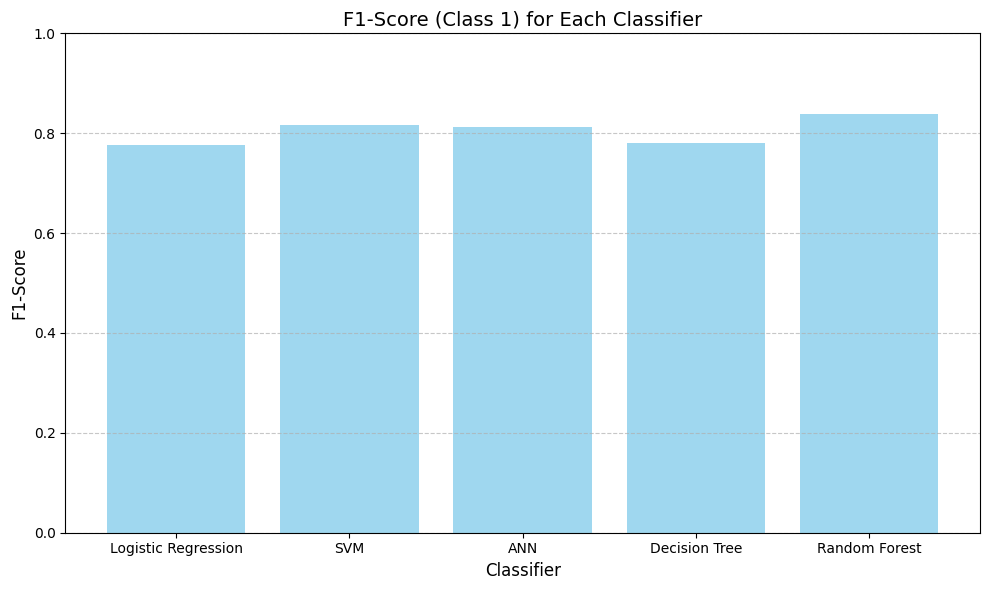

In [ ]:
import matplotlib.pyplot as plt

# Define classifiers and their F1-scores
classifiers = ["Logistic Regression", "SVM", "ANN", "Decision Tree", "Random Forest"]
f1_scores = [0.7767, 0.8156, 0.8119, 0.78, 0.838]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(classifiers, f1_scores, color='skyblue', alpha=0.8)
plt.title("F1-Score (Class 1) for Each Classifier", fontsize=14)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Classifier", fontsize=12)
plt.ylim(0, 1)  # Ensure consistent scaling
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


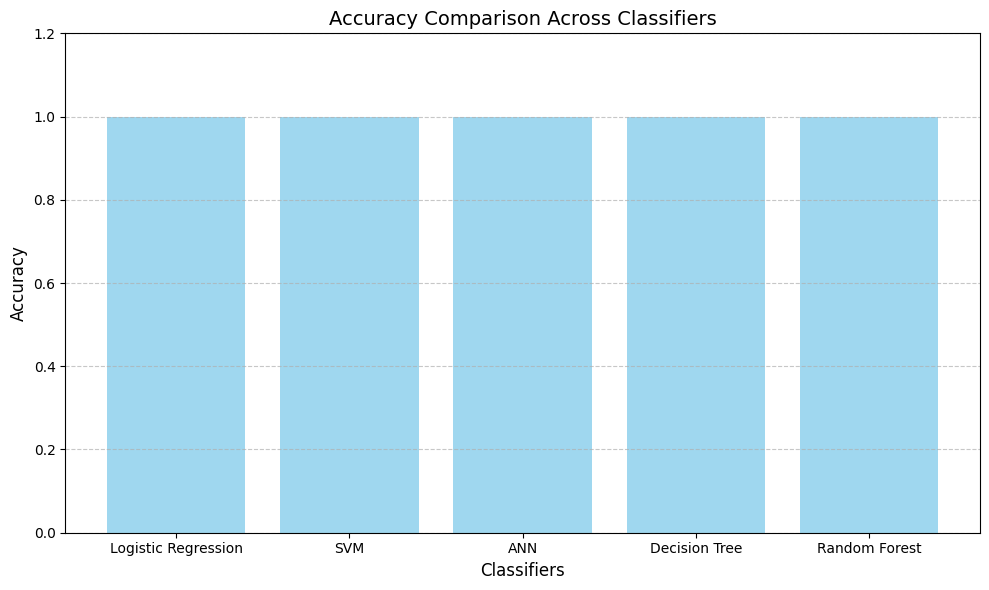

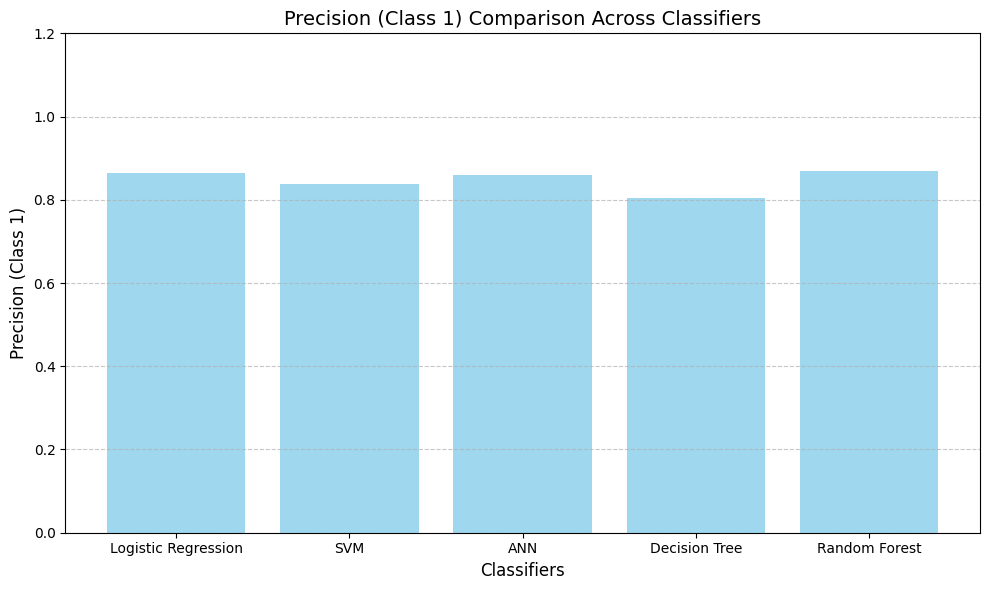

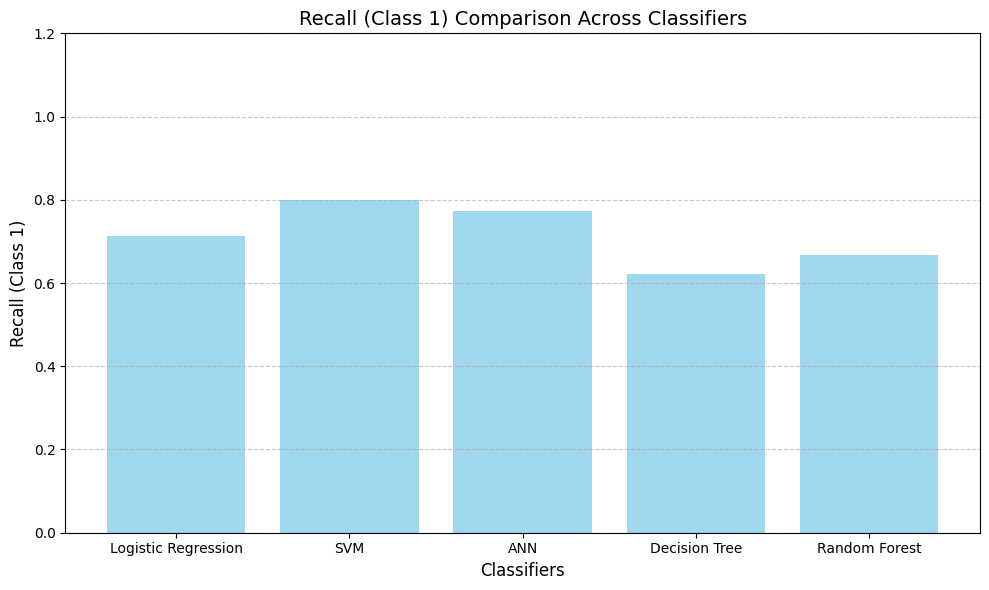

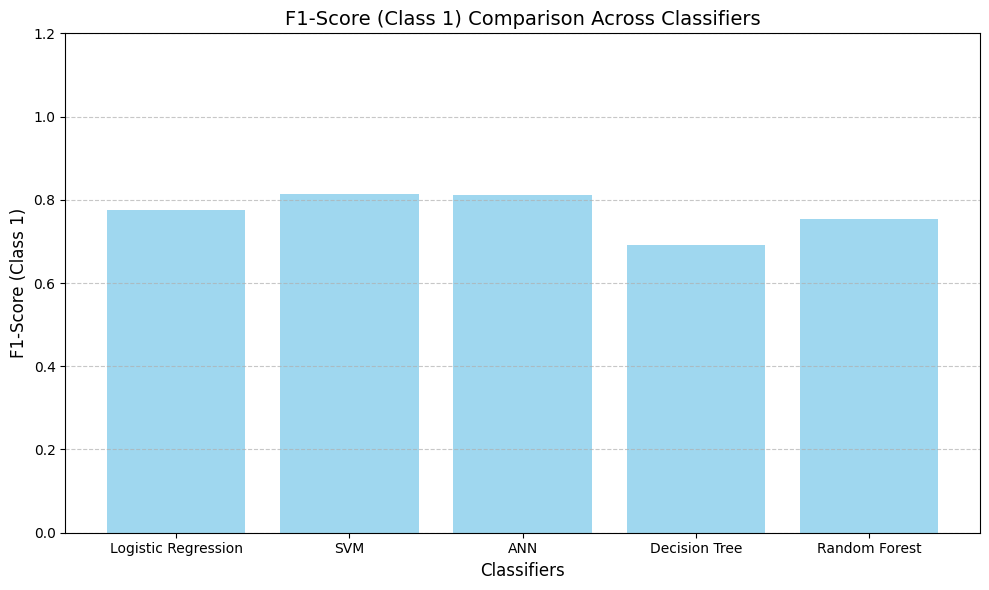

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define classifiers and their metrics
classifiers = ["Logistic Regression", "SVM", "ANN", "Decision Tree", "Random Forest"]
metrics = {
    "Accuracy": [0.999, 0.999, 0.999, 0.999, 0.999],
    "Precision (Class 1)": [0.864, 0.838, 0.859, 0.805, 0.87],
    "Recall (Class 1)": [0.713, 0.800, 0.774, 0.621, 0.668],
    "F1-Score (Class 1)": [0.776, 0.815, 0.811, 0.691, 0.753]
}

# Create a bar plot for each metric
for metric_name, values in metrics.items():
    plt.figure(figsize=(10, 6))
    plt.bar(classifiers, values, color="skyblue", alpha=0.8)
    plt.title(f"{metric_name} Comparison Across Classifiers", fontsize=14)
    plt.ylabel(metric_name, fontsize=12)
    plt.xlabel("Classifiers", fontsize=12)
    plt.ylim(0, 1.2)  # Consistent scaling for all plots
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


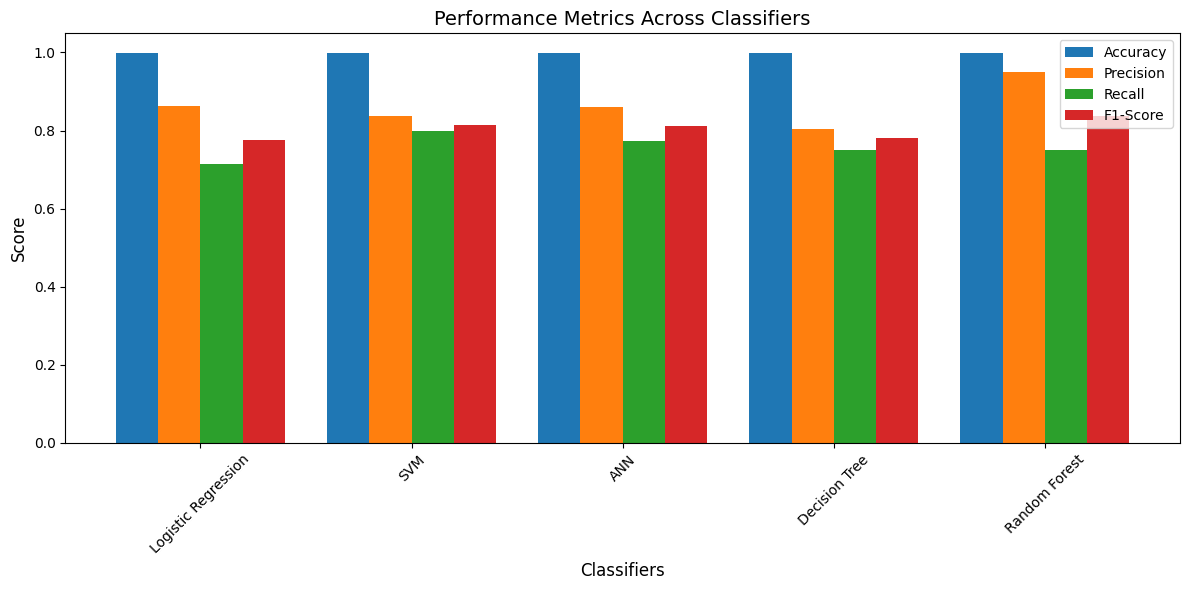

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
classifiers = ["Logistic Regression", "SVM", "ANN", "Decision Tree", "Random Forest"]
metrics = {
    "Accuracy": [0.999, 0.999, 0.999, 0.999, 0.999],
    "Precision": [0.864, 0.838, 0.859, 0.805, 0.95],
    "Recall": [0.713, 0.800, 0.774, 0.75, 0.75],
    "F1-Score": [0.776, 0.815, 0.811, 0.78, 0.838]
}

# Prepare data for grouped bar chart
x = np.arange(len(classifiers))  # X-axis positions
width = 0.2  # Width of each bar

# Create grouped bars for each metric
plt.figure(figsize=(12, 6))
for idx, (metric, values) in enumerate(metrics.items()):
    plt.bar(x + idx * width, values, width, label=metric)

# Customize plot
plt.xticks(x + width * 1.5, classifiers, rotation=45)
plt.title("Performance Metrics Across Classifiers", fontsize=14)
plt.xlabel("Classifiers", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


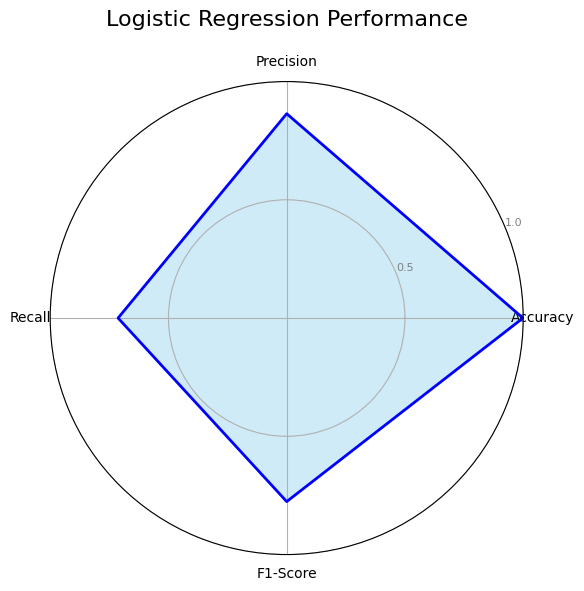

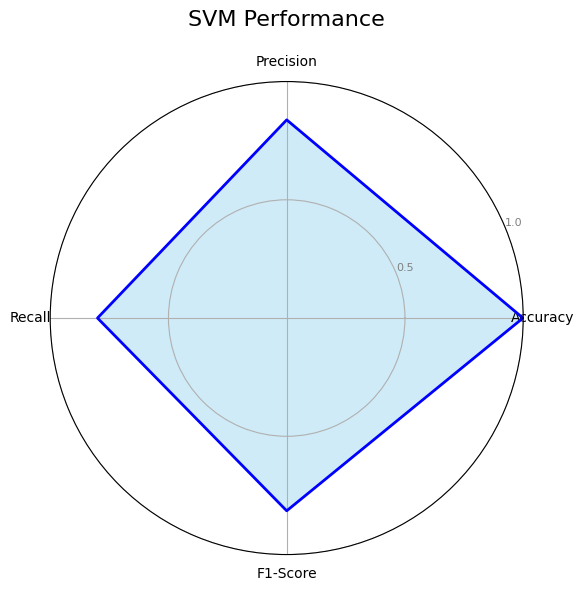

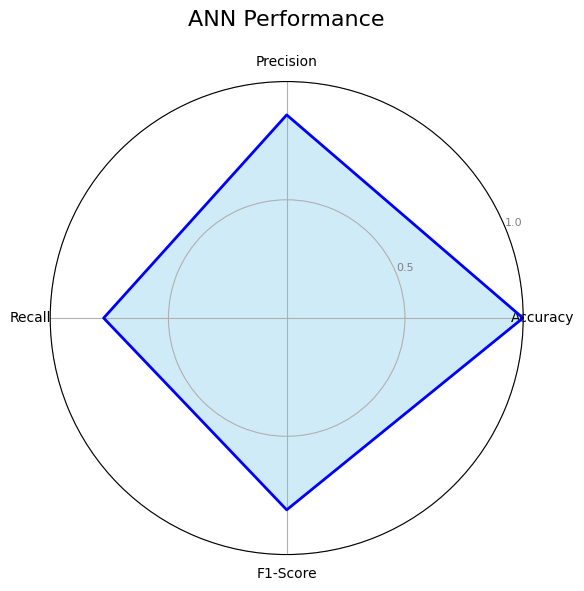

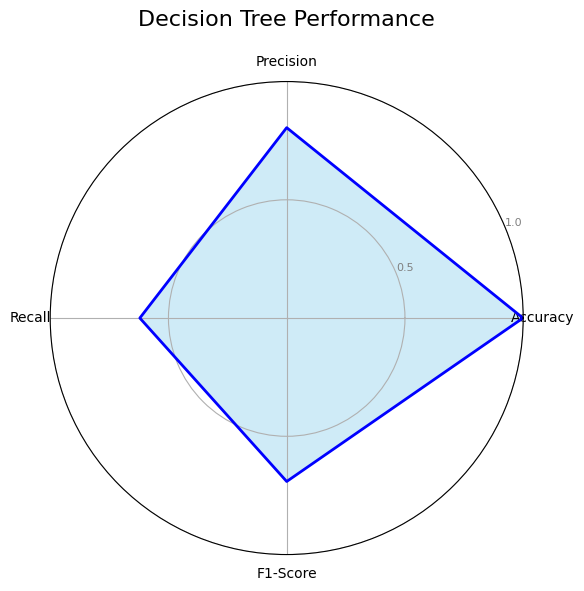

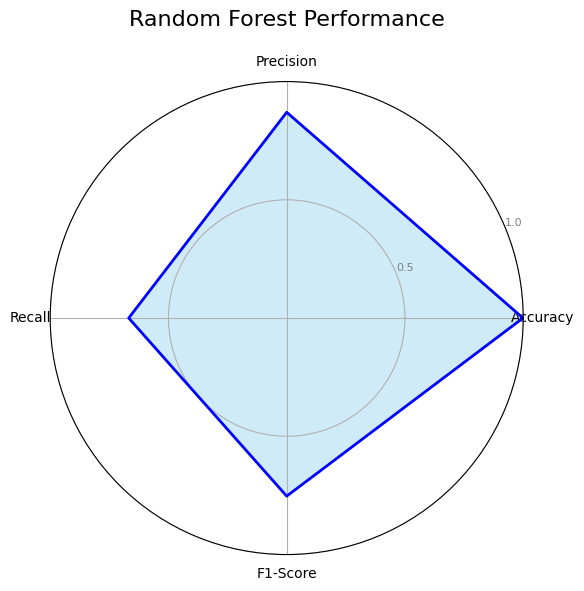

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
classifiers = ["Logistic Regression", "SVM", "ANN", "Decision Tree", "Random Forest"]
metrics = {
    "Accuracy": [0.999, 0.999, 0.999, 0.999, 0.999],
    "Precision": [0.864, 0.838, 0.859, 0.805, 0.87],
    "Recall": [0.713, 0.800, 0.774, 0.621, 0.668],
    "F1-Score": [0.776, 0.815, 0.811, 0.691, 0.753]
}

# Radar chart setup
metrics_names = list(metrics.keys())
num_vars = len(metrics_names)

for idx, classifier in enumerate(classifiers):
    values = [metrics[metric][idx] for metric in metrics_names]
    values += values[:1]  # Repeat first value to close the loop

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(8, 6))
    plt.subplot(111, polar=True)
    plt.fill(angles, values, color="skyblue", alpha=0.4)
    plt.plot(angles, values, color="blue", linewidth=2)

    plt.title(f"{classifier} Performance", size=16, y=1.1)
    plt.xticks(angles[:-1], metrics_names)
    plt.yticks([0.5, 1.0], ["0.5", "1.0"], color="gray", size=8)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


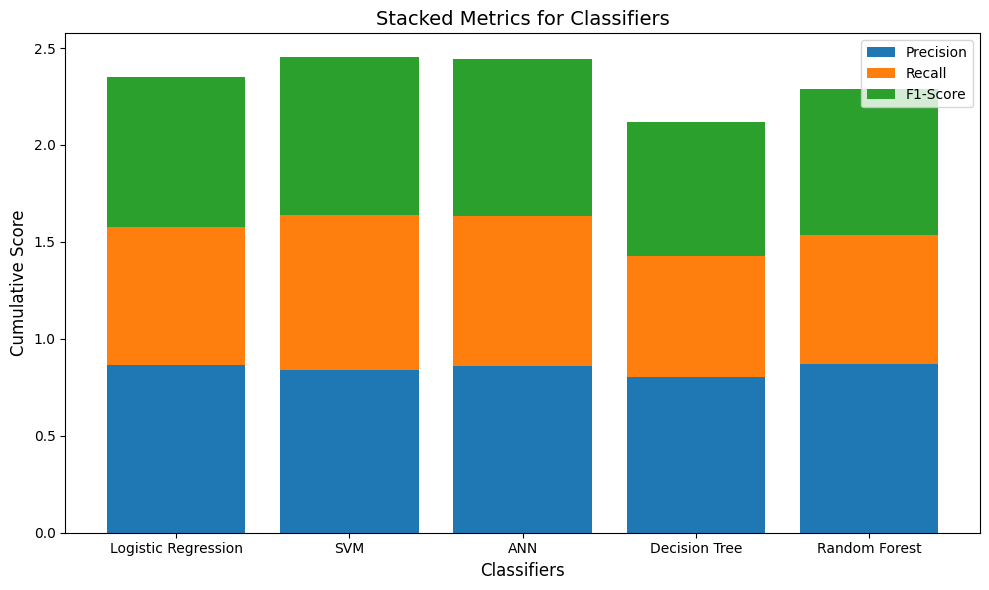

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
classifiers = ["Logistic Regression", "SVM", "ANN", "Decision Tree", "Random Forest"]
metrics = {
    "Precision": [0.864, 0.838, 0.859, 0.805, 0.87],
    "Recall": [0.713, 0.800, 0.774, 0.621, 0.668],
    "F1-Score": [0.776, 0.815, 0.811, 0.691, 0.753]
}

# Prepare data for stacked bar chart
values = np.array([metrics[metric] for metric in metrics.keys()])

# Plot
plt.figure(figsize=(10, 6))
bar_positions = np.arange(len(classifiers))
bottom_values = np.zeros(len(classifiers))
for idx, (metric_name, metric_values) in enumerate(metrics.items()):
    plt.bar(classifiers, metric_values, bottom=bottom_values, label=metric_name)
    bottom_values += metric_values

# Customize plot
plt.title("Stacked Metrics for Classifiers", fontsize=14)
plt.xlabel("Classifiers", fontsize=12)
plt.ylabel("Cumulative Score", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()
